In [1]:
import pandas as pd
import pickle,os, copy
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import sys
import scipy

import re

from sklearn.cluster import DBSCAN


import margin_flatness as mf
import margin_flatness.postprocessing as mf_post


%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = (13,9)

COLORS = plt.cm.tab20(np.arange(20))

CORRECT_COLOR_IDX = 3
INCORRECT_COLOR_IDX = 1

In [2]:
# add random data to data_getter
# Put a model in a folder. Maybe train for 0 steps. or train on random data. 
# we should now be able to use everything simply.

# Try to test our stuff on more complicated models. VGG or AlexNet. The pretrained ones for now? 

In [5]:
root_folder = os.environ["PATH_TO_DEEP_FOLDER"]
data_name = "MNIST"
exp = "MSE_F1"
experiment_folder = os.path.join(root_folder, "experiments", data_name, exp)

In [6]:
stats_df = mf_post.stats_plotting.get_end_stats(experiment_folder, step=-1)


In [7]:
stats_df.sort_values(by="Acc Test Mean", ascending=False)

Loss Test Mean  Loss Train Mean  Acc Train Mean  \
1605729861.2700624        0.002310         0.000188        0.999733   
1605702831.5614505        0.002460         0.000173        0.999717   
1605733882.8815174        0.002441         0.000106        0.999817   
1605716380.9829261        0.002481         0.000194        0.999633   
1605767263.584062         0.002339         0.000171        0.999267   
...                            ...              ...             ...   
1605770210.8307066        0.003744         0.001703        0.990667   
1605779348.659534         0.003854         0.001599        0.991667   
1605775062.5808423        0.004645         0.002732        0.985583   
1605784676.2389796        0.004632         0.002779        0.983100   
1605765955.4218683        0.005023         0.003709        0.979717   

                    Acc Test Mean  Acc Gap Mean  Trace Mean  Trace Mean Std  \
1605729861.2700624         0.9860     -0.013733   85.302308       47.089470   
1605702831.5614505         0.9860     -0.013717   86.535316       36.591545   
1605733882.8815174         0.9853     -0.014517  190.163260       70.513217   
1605716380.9829261         0.9851     -0.014533   81.442028       52.759209   
1605767263.584062          0.9845     -0.014767  381.118257      363.674129   
...                           ...           ...         ...             ...   
1605770210.8307066         0.9764     -0.014267  626.689947      639.310341   
1605779348.659534          0.9762     -0.015467  670.645866      717.484301   
1605775062.5808423         0.9725     -0.013083  300.175159      242.305828   
1605784676.2389796         0.9714     -0.011700  299.032619      310.897900   
1605765955.4218683         0.9705     -0.009217  341.185288      325.695012   

                   batch_train_size learning_rate seed weight_decay  
1605729861.2700624               32           0.1   10            0  
1605702831.5614505               32           0.1    0            0  
1605733882.8815174               32          0.04   10            0  
1605716380.9829261               32           0.1    5            0  
1605767263.584062               256           0.2    0       0.0005  
...                             ...           ...  ...          ...  
1605770210.8307066               32           0.1    0       0.0005  
1605779348.659534                32           0.1    5       0.0005  
1605775062.5808423               32           0.2    5       0.0005  
1605784676.2389796               32           0.2   10       0.0005  
1605765955.4218683               32           0.2    0       0.0005  

[81 rows x 11 columns]

In [35]:
len(stats_df)

81

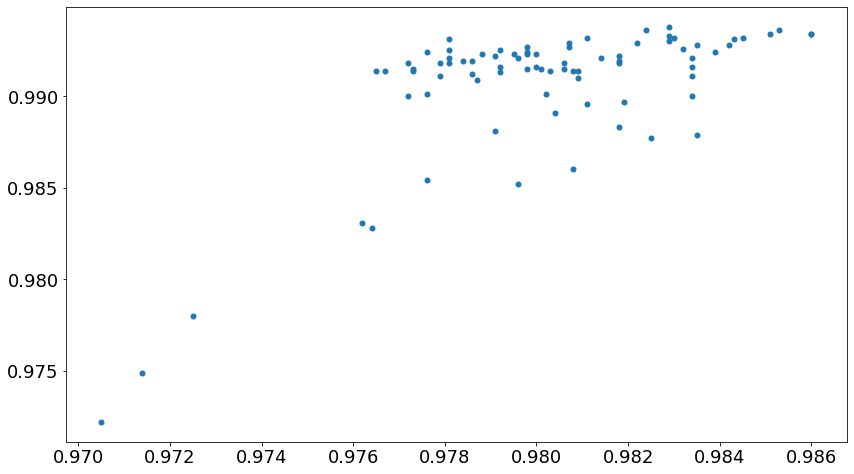

In [55]:
mm2 = [mm[exp_id] for exp_id in stats_df.index]

plt.scatter(x=stats_df["Acc Test Mean"], y=mm2)

In [ ]:
We know robustness works from the Novak paper ! lets' goooooasidfj;alisjdf;iajsdfpoaisjdf;asdJFJDSX

In [57]:
corr_candidate_filter = mf_post.postprocess_experiment.get_exp_margins(experiment_folder, softmax_outputs=False, step=step, seed=0, device=None, num_datapoints=10000, on_test_set=False, should_cache=False)


0.843238353729248
0.765902042388916
0.8386058807373047
0.8432130813598633
0.8352320194244385
0.8518831729888916
0.9415149688720703
0.8325870037078857
0.8179409503936768
0.8208811283111572
0.843951940536499
0.824415922164917
0.823106050491333
0.8088700771331787
0.73673415184021
0.8202922344207764
0.8215928077697754
0.81951904296875
0.8281347751617432
0.8199300765991211
0.8215658664703369
0.8287034034729004
0.8227450847625732
0.8180820941925049
0.8220317363739014
0.803239107131958
0.7345218658447266
0.821143627166748
0.8161547183990479
0.8324038982391357
0.824120044708252
0.8312759399414062
0.8292992115020752
0.8270959854125977
0.817173957824707
0.8238108158111572
0.8285162448883057
0.8387999534606934
0.8017468452453613
0.763077974319458
0.8223230838775635
0.7992730140686035
0.8333351612091064
0.8257229328155518
0.8182182312011719
0.8220820426940918
0.818964958190918
0.8123250007629395
0.8245410919189453
0.8130950927734375
0.8110208511352539
0.7994368076324463
0.7812550067901611
0.814841

In [56]:
mm = {exp_id: np.mean(v['0'][0]) for exp_id, v in corr_candidate_filter.items()}

# Plot Correlations

In [12]:
# all_steps = mf.save_load.get_exp_steps(experiment_folder)
# all_steps = np.array([list(v.keys()) for v in all_steps.values()]).reshape(-1)
# all_steps = sorted(list(set(all_steps)))

# Plot trace vs margins
# X_axis_name = "Output Margins"
X_axis_name = "Output Margins"
Y_axis_name = "Empirical Trace"


plot_name = "C_IC"
X_axis_bounds = None #[0, 1.001]
Y_axis_bounds = None #[0, 200]

should_save = False


filter_seperate = ["batch_train_size", "learning_rate", "weight_decay", "seed"]
filter_not_seperate = None

pre_filtered_exp_ids = None

use_correct_filter = True
draw_correlation = True



0.05007505416870117
0.046183109283447266
0.04913592338562012
0.047286033630371094
0.048748016357421875
0.04860186576843262
0.057936906814575195
0.044809818267822266
0.0482182502746582
0.04476809501647949
0.04320216178894043
0.0475611686706543
0.04614400863647461
0.0536191463470459
0.054151058197021484
0.11521410942077637
0.055338144302368164
0.04950404167175293
0.0558168888092041
0.05624103546142578
0.04740595817565918
0.0491330623626709
0.04712224006652832
0.05521106719970703
0.04988503456115723
0.045720815658569336
0.04891490936279297
0.05672192573547363
0.053750038146972656
0.04858708381652832
0.05452680587768555
0.04930686950683594
0.049723148345947266
0.04700493812561035
0.04836678504943848
0.05579209327697754
0.04909491539001465
0.05159497261047363
0.046353816986083984
0.10791397094726562
0.04996299743652344
0.044760942459106445
0.04830002784729004
0.049859046936035156
0.048223018646240234
0.04789590835571289
0.04523110389709473
0.050994873046875
0.04719710350036621
0.04468607902

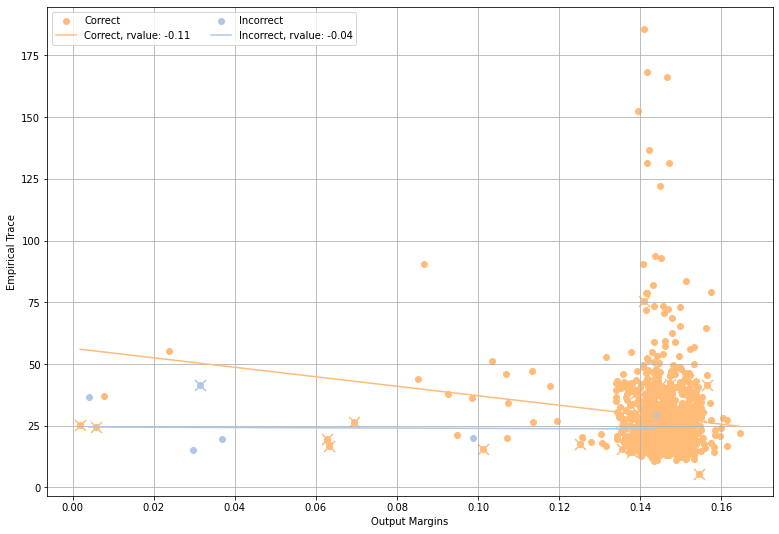

['1605727398.3056748']
28.482268783344992


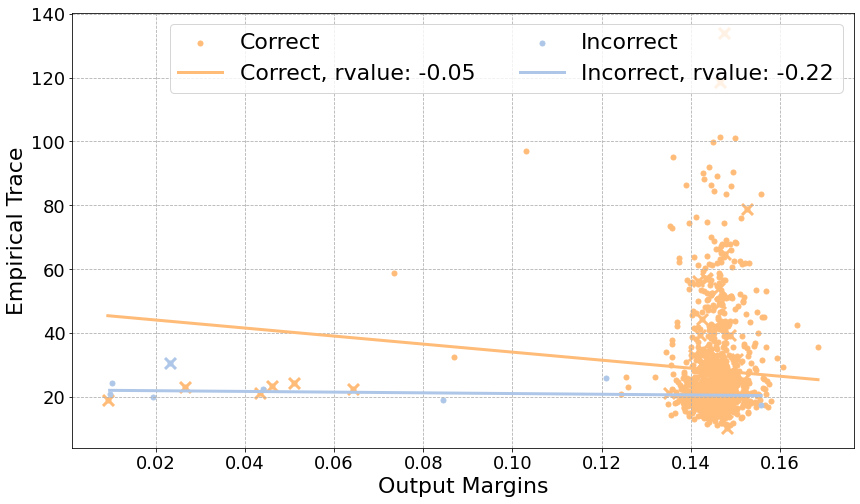

['1605714041.8589373']
31.889828888034508


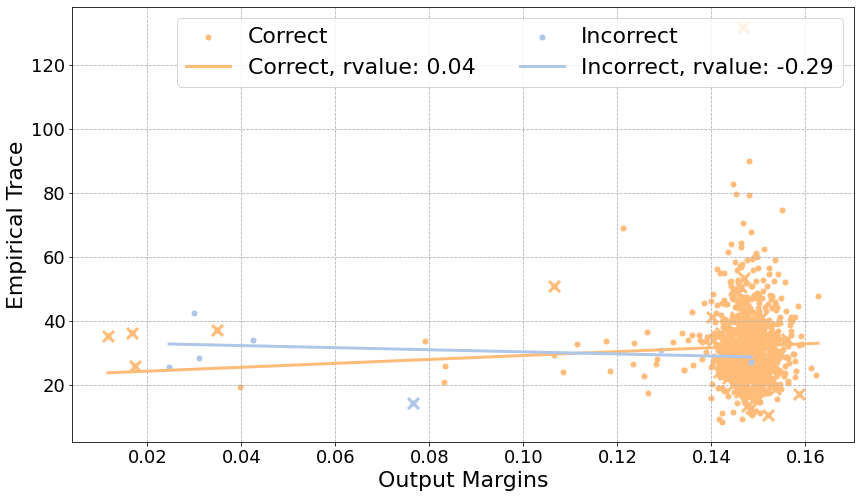

['1605741996.3663666']
96.54473210463054


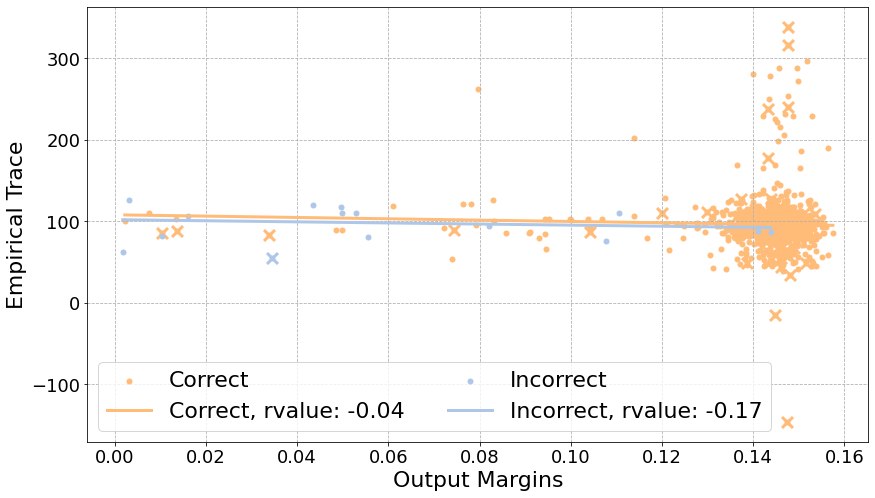

['1605758179.2206457']
98.61357601464421


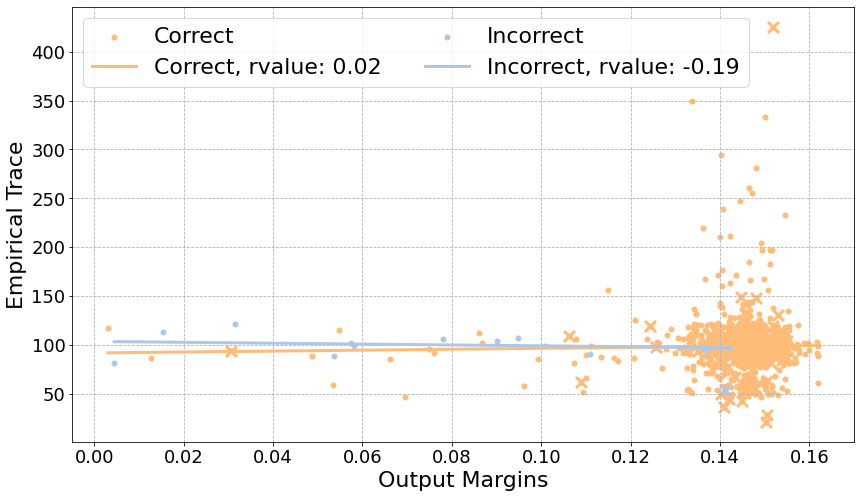

['1605750263.755094']
113.10189976816254


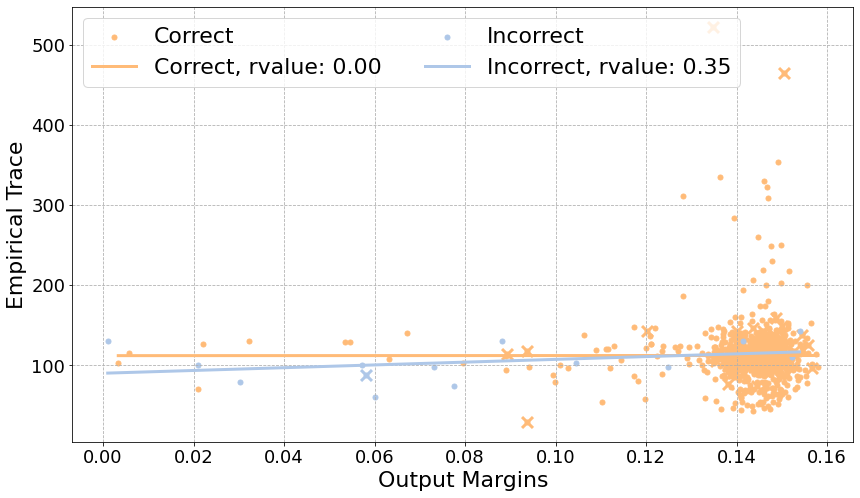

['1605765955.4218683']
341.9523455859264


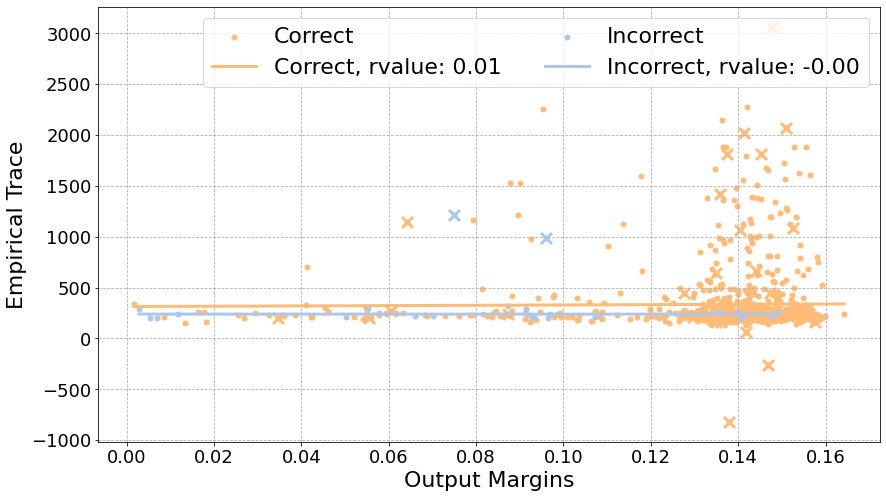

['1605784676.2389796']
301.2417917146626


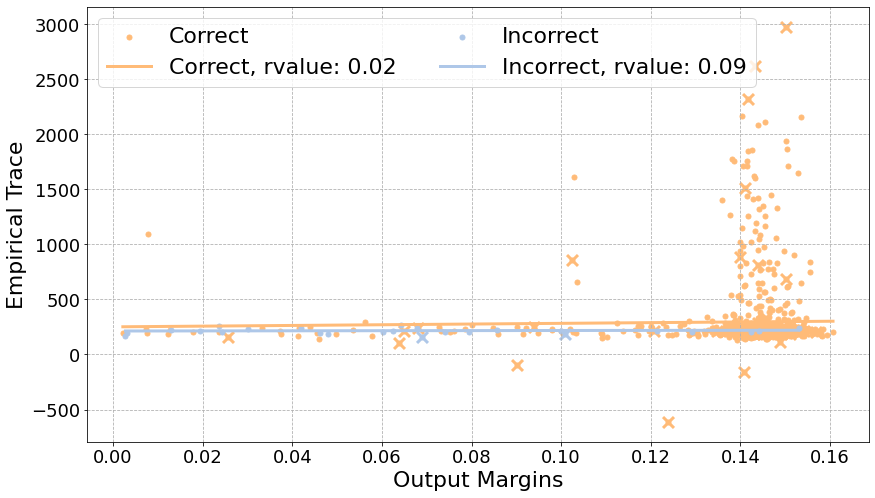

['1605775062.5808423']
301.1047684660844


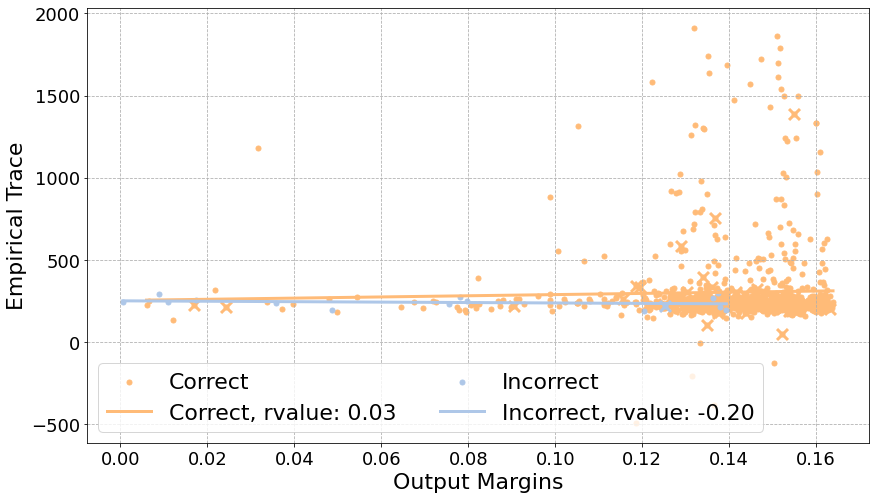

['1605702831.5614505']
86.51227054507122


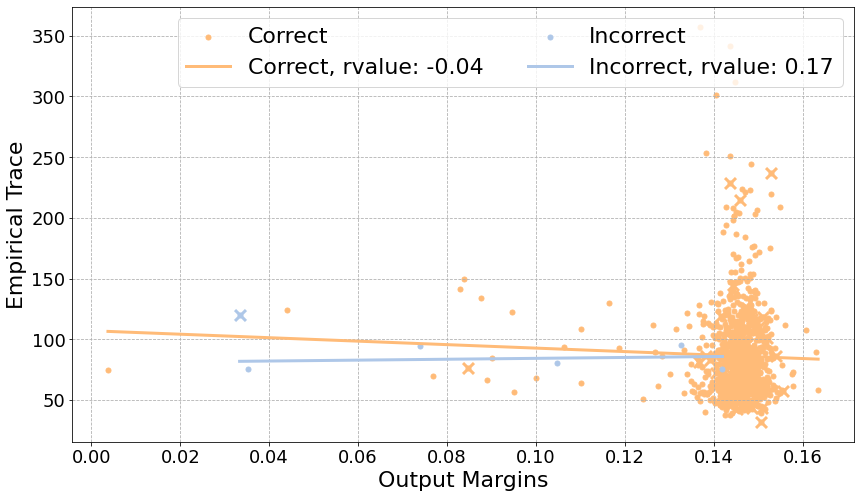

['1605729861.2700624']
85.3954383069607


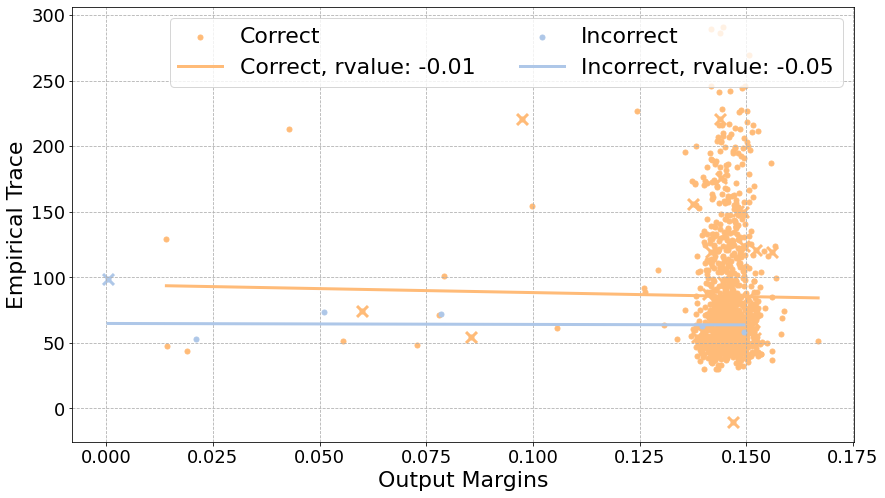

['1605716380.9829261']
81.55817913460238


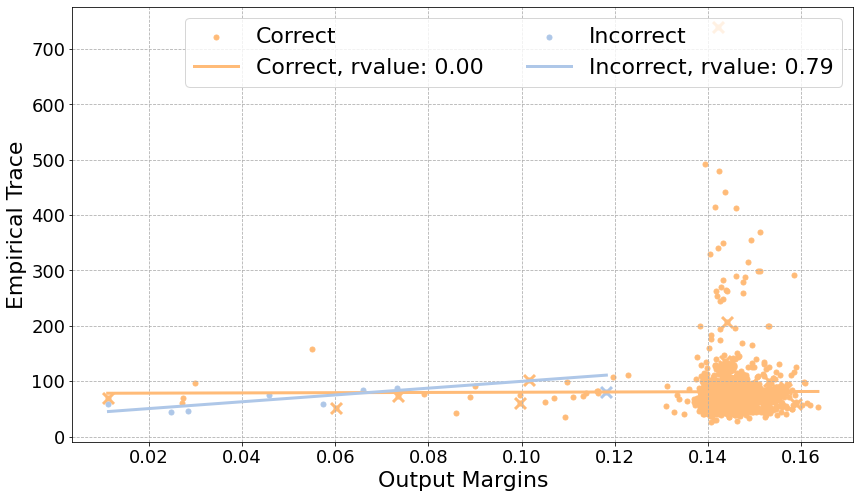

['1605743907.6908658']
256.0068976444293


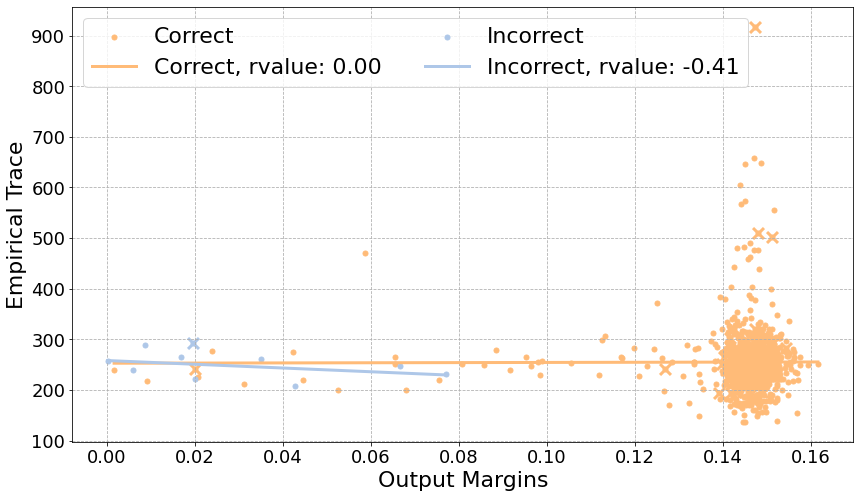

['1605759823.7472556']
259.9535225816585


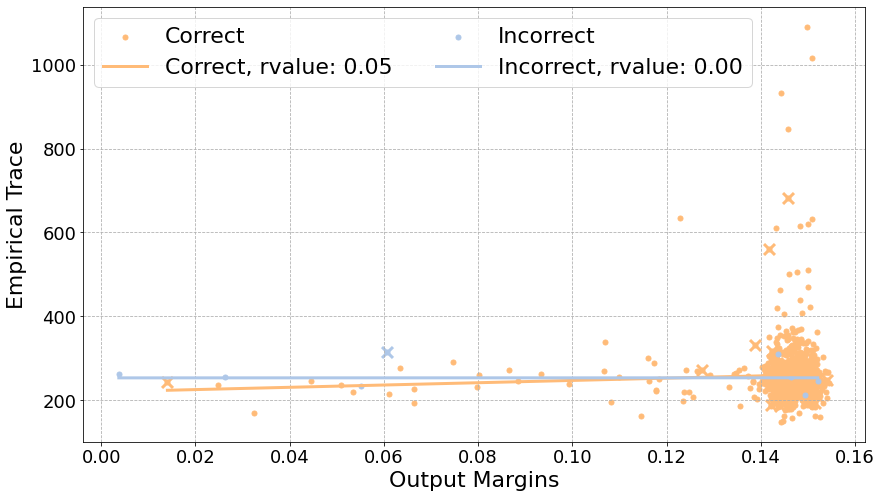

['1605752054.6483705']
279.41308212481437


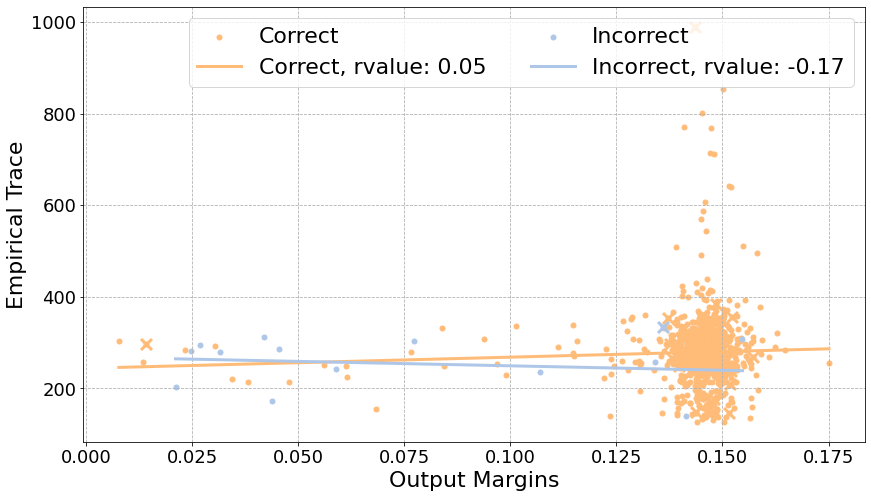

['1605770210.8307066']
627.7583906019405


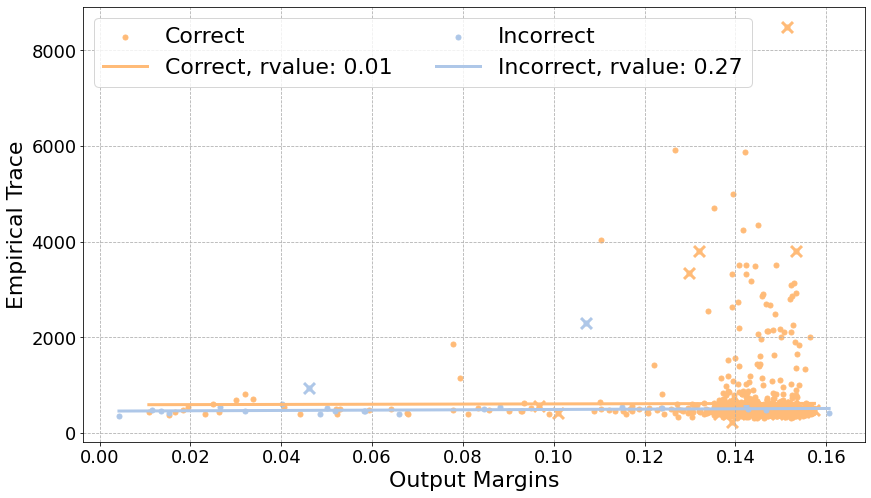

['1605788868.0866516']
619.2941104355873


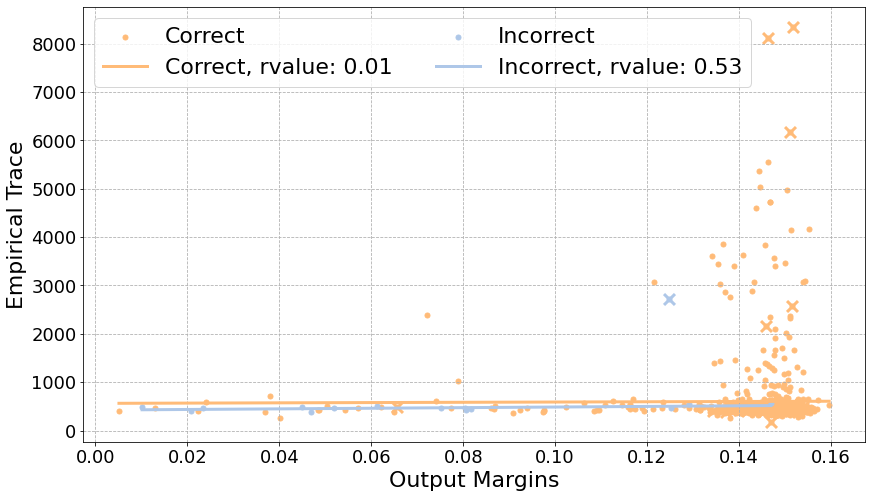

['1605779348.659534']
666.8737495714805


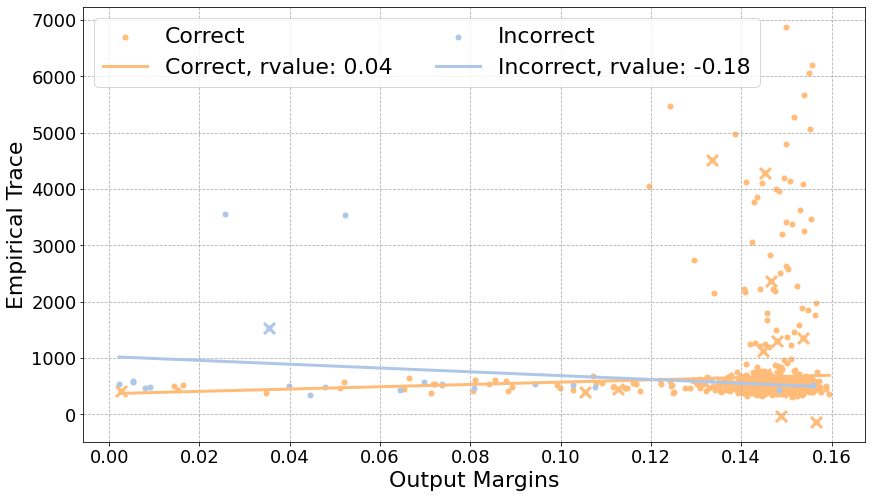

['1605706875.216069']
201.42914133849396


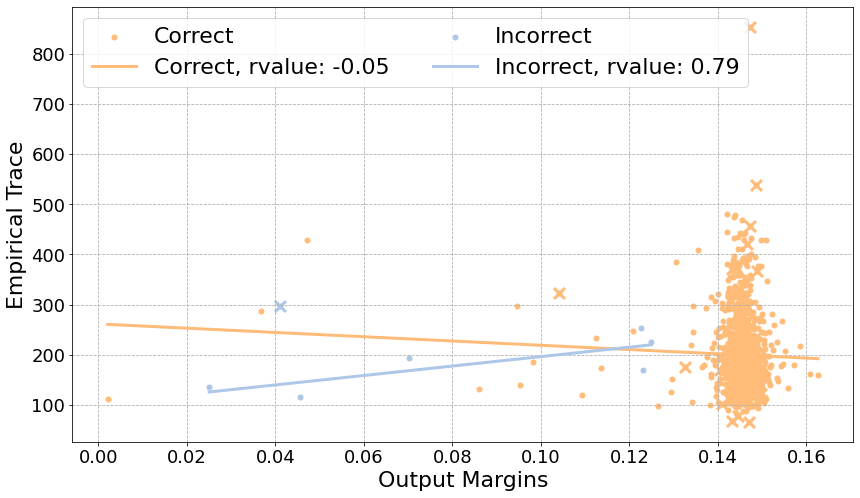

['1605733882.8815174']
190.1420674179666


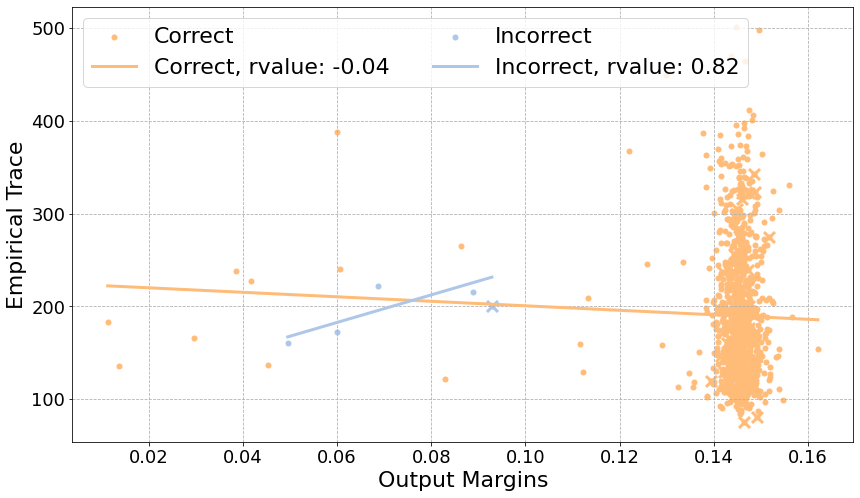

['1605720057.117706']
191.04590024149212


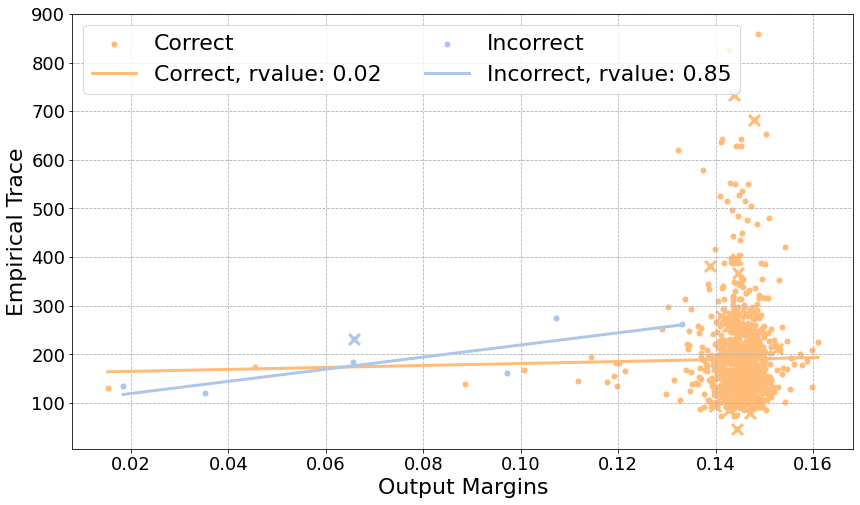

['1605746281.4950202']
171.01972529153446


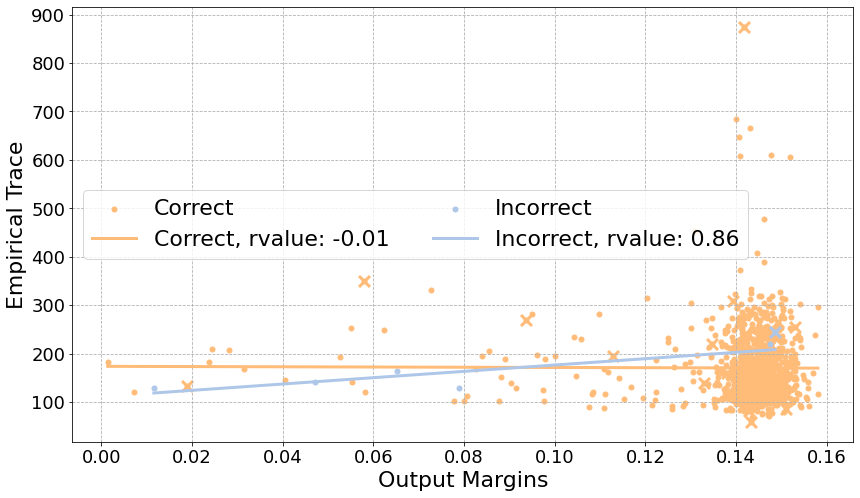

['1605762088.9463785']
194.49148918962413


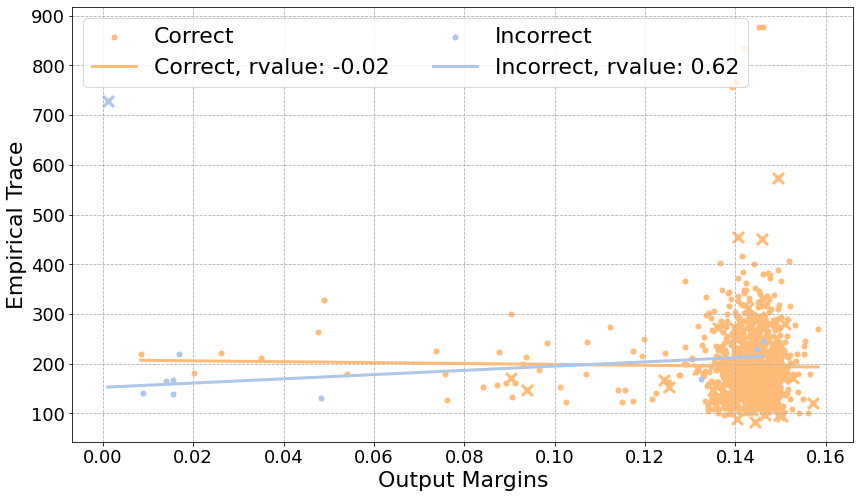

['1605754369.3954513']
178.28331851520642


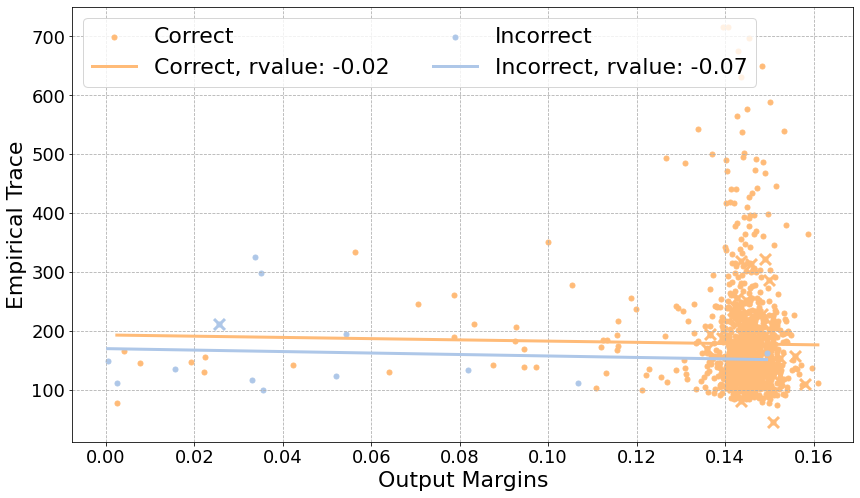

['1605772678.6334057']
814.6425144796207


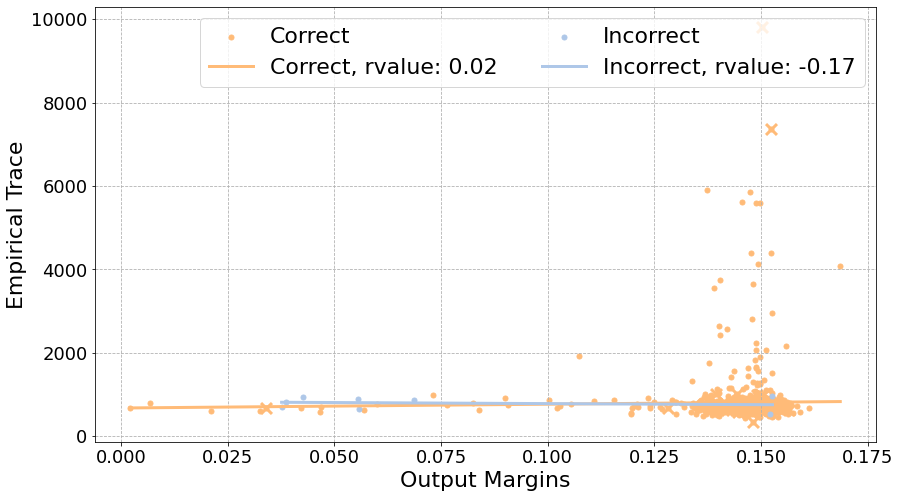

['1605791426.5139246']
939.9021084256158


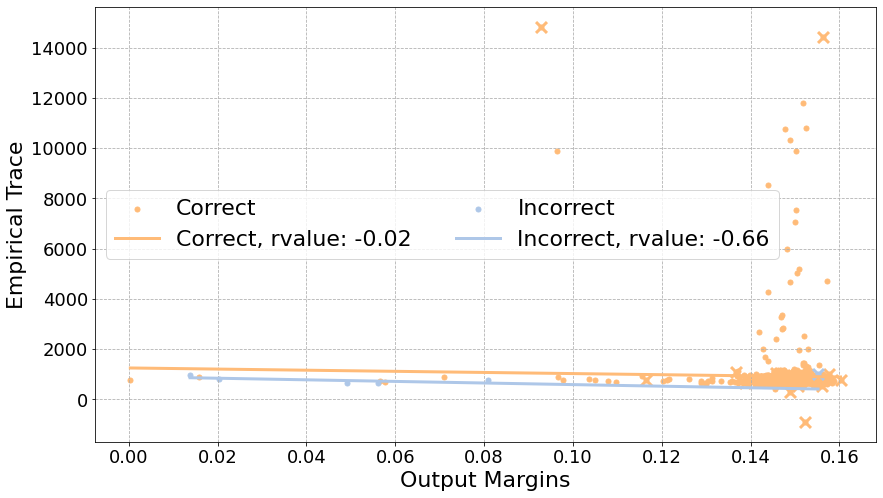

['1605781650.461344']
1047.7028842479879


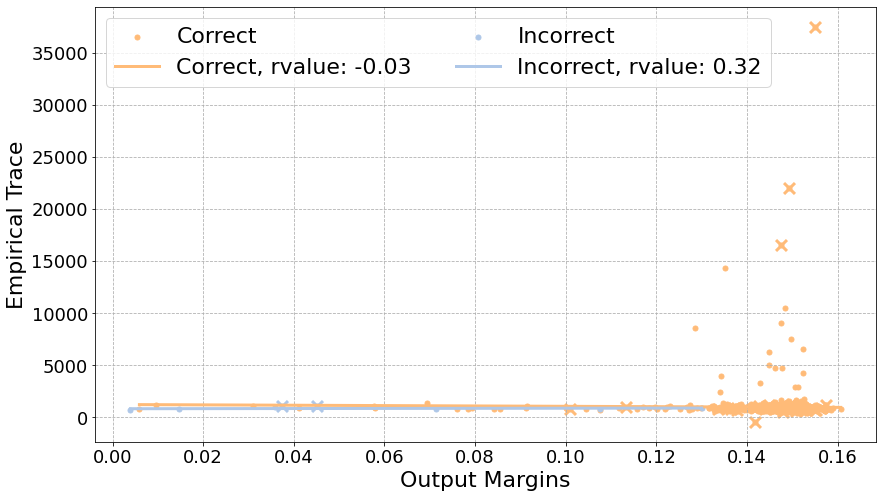

['1605701242.6793427']
215.69329347019172


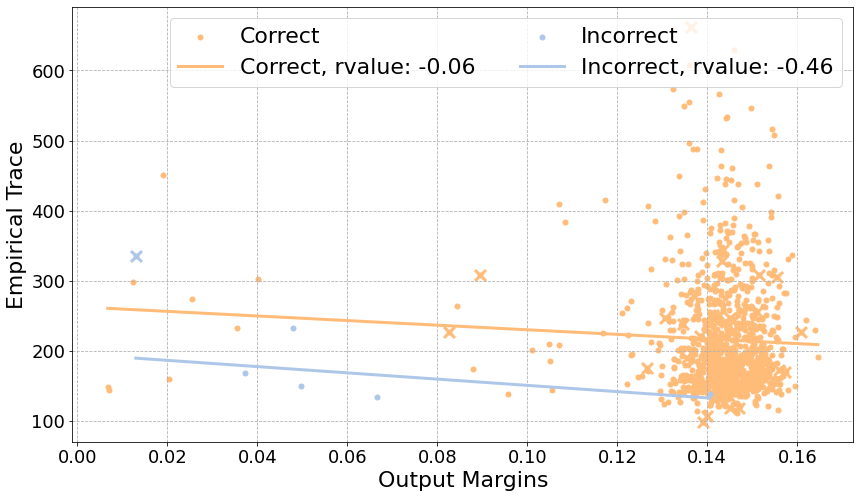

['1605728272.9561367']
200.62628698124607


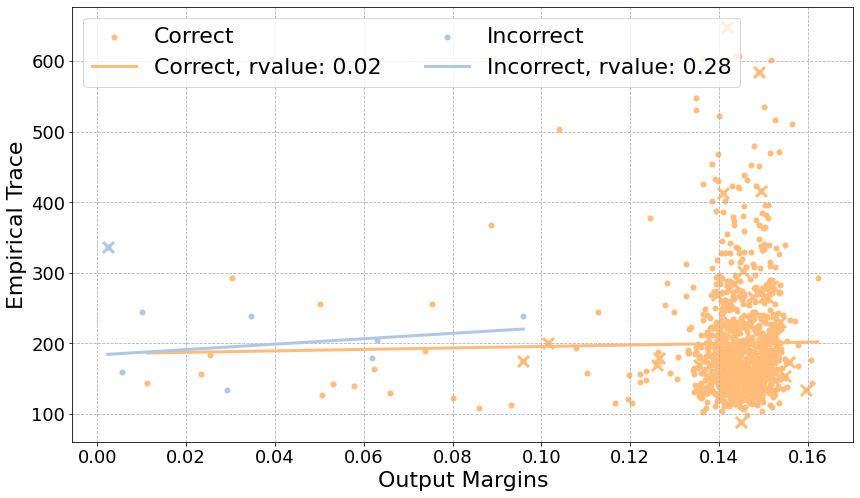

['1605714883.0962937']
183.05034171495834


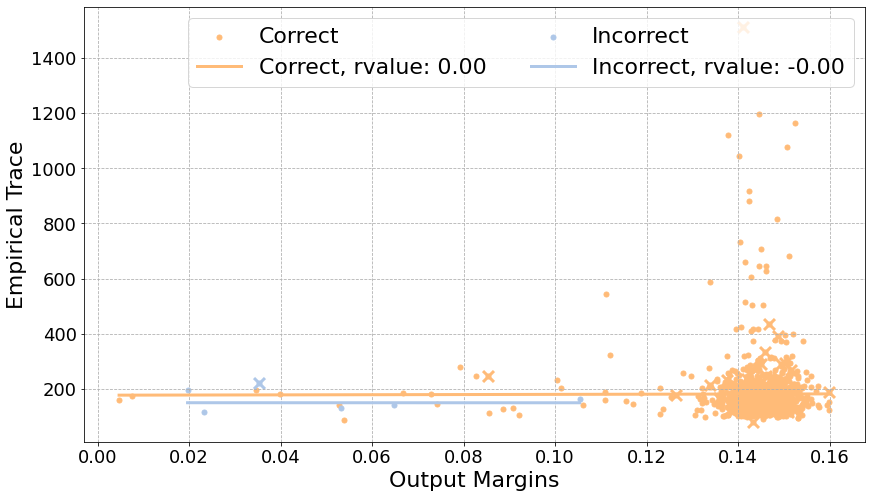

['1605743165.8834424']
169.8853566200693


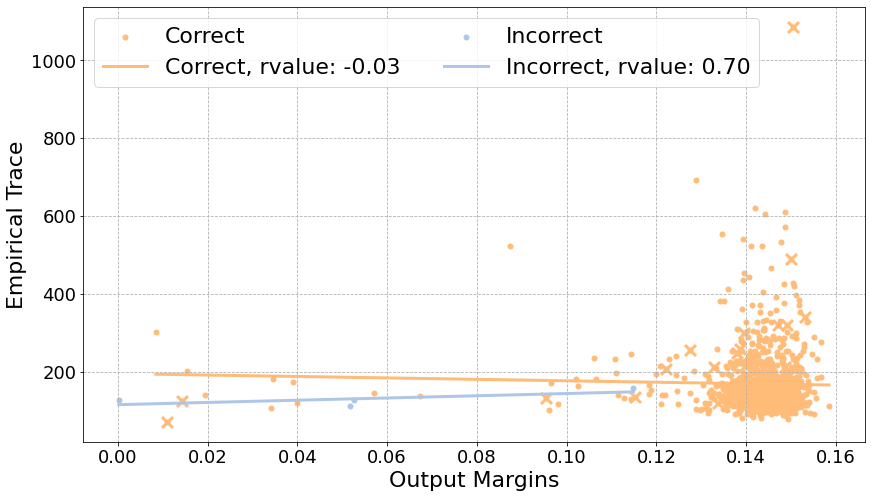

['1605759164.6600258']
166.72068766612668


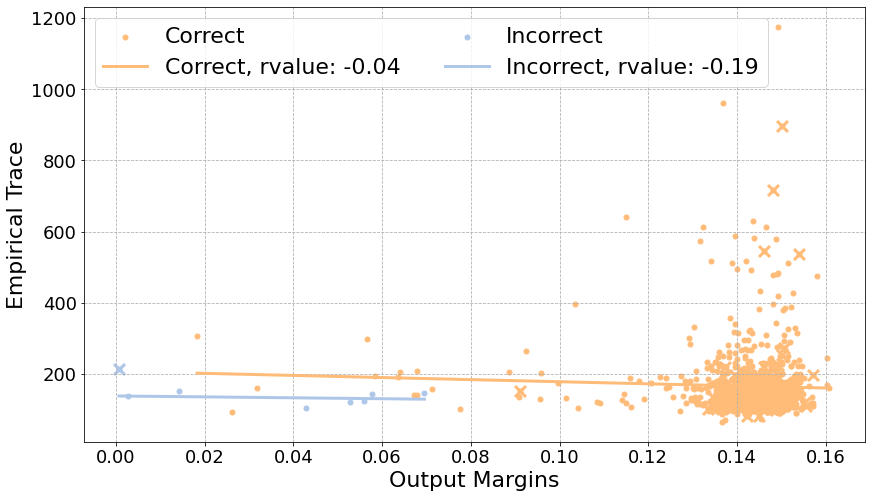

['1605751420.0456178']
169.54274112704155


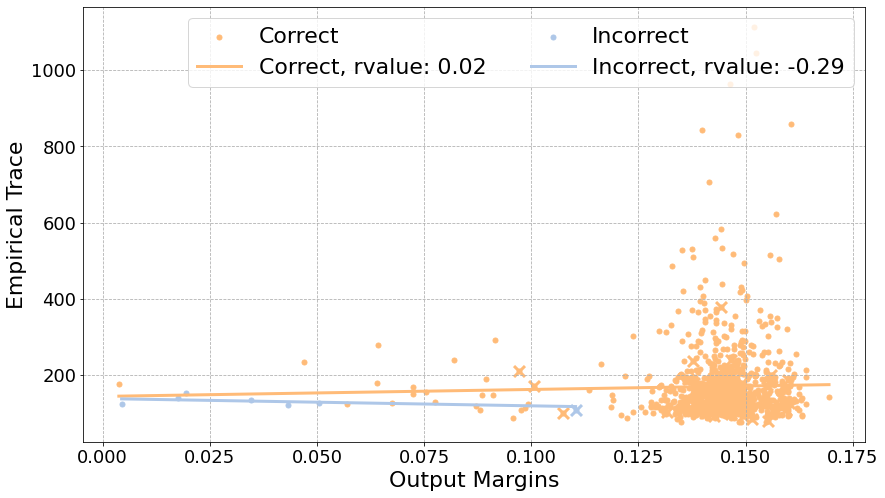

['1605769764.1045053']
230.6150501482435


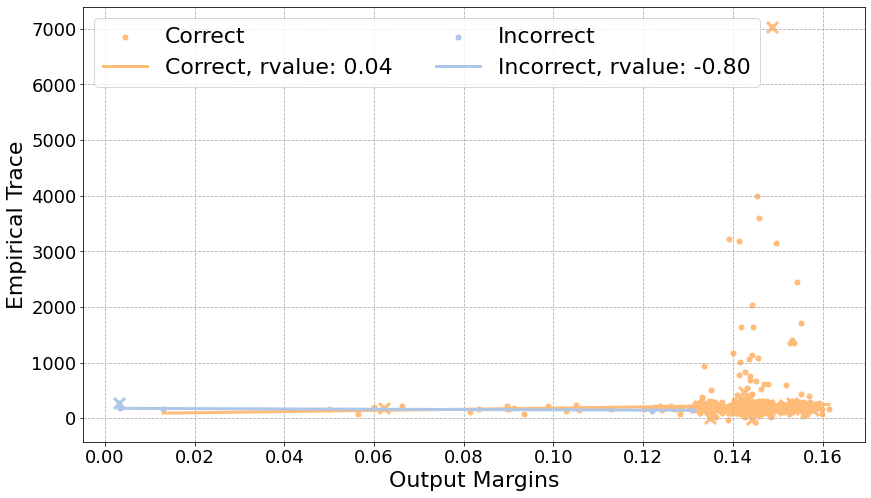

['1605788459.6901867']
282.2319515083428


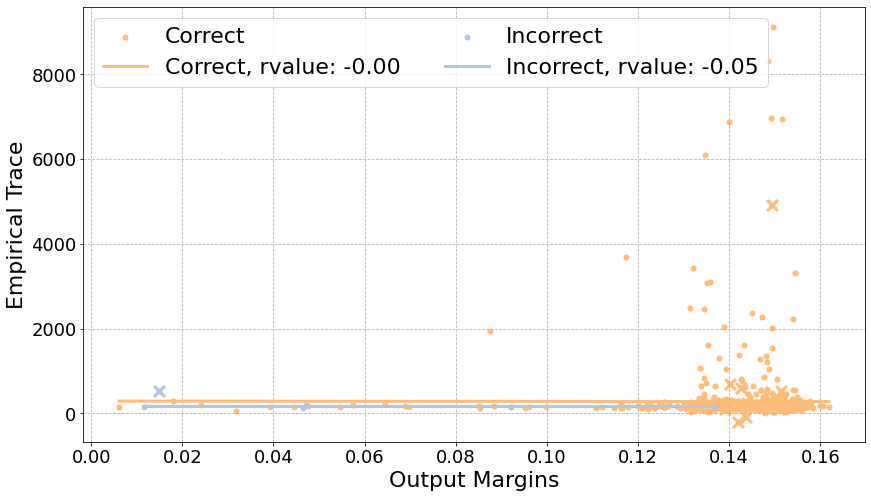

['1605778887.3960185']
353.9023563938351


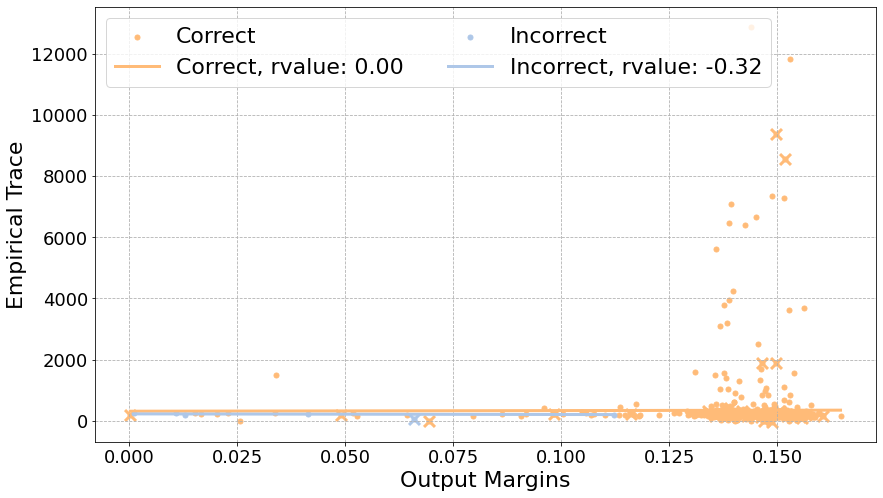

['1605704132.2566583']
281.66141219242917


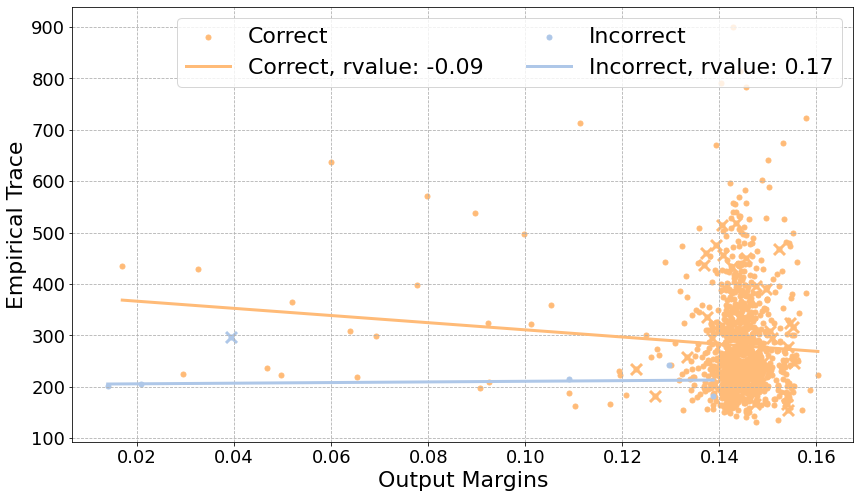

['1605731133.7407315']
280.18073834702085


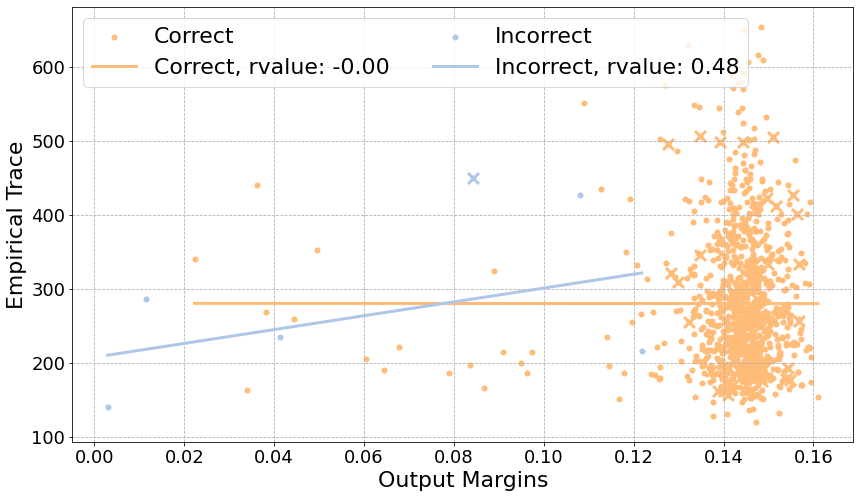

['1605717546.2333405']
257.7304387669694


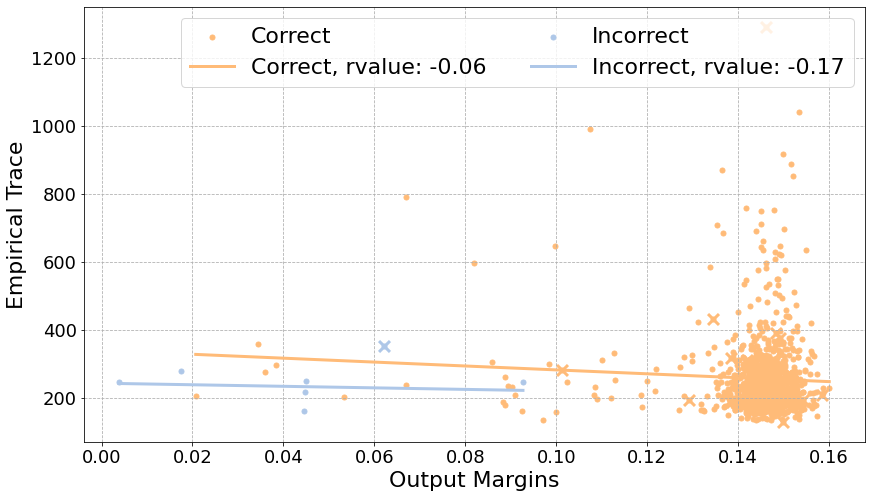

['1605745082.772649']
208.74360964753336


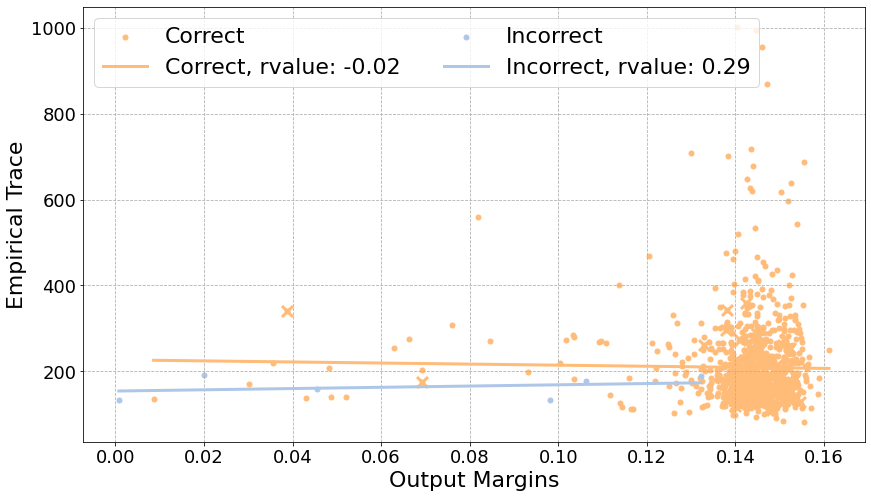

['1605760864.3097575']
197.62868653466347


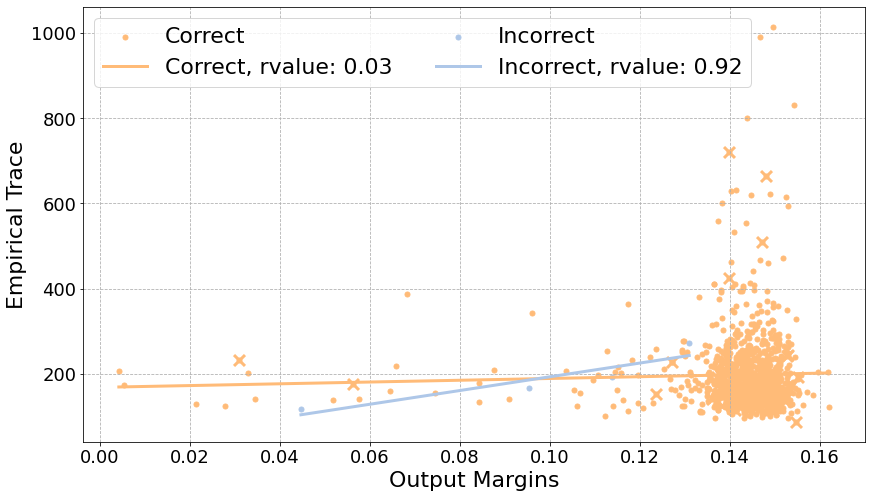

['1605753197.0820897']
201.4270337068832


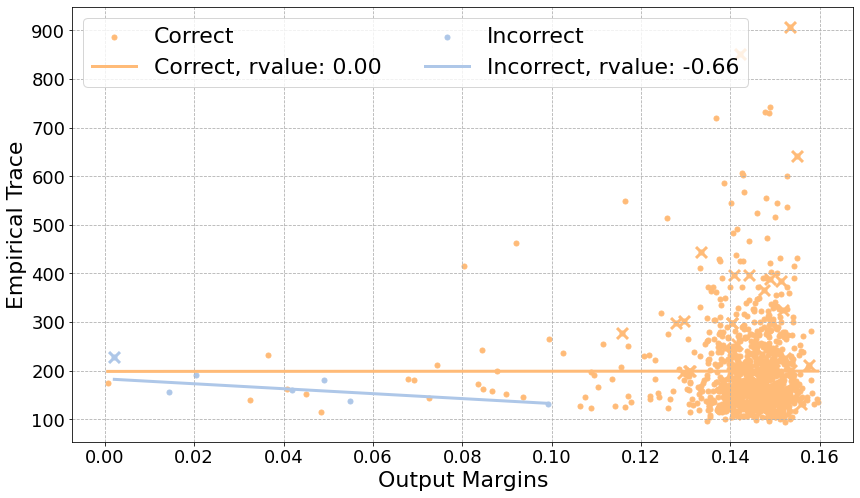

['1605772021.5149362']
280.64222900001164


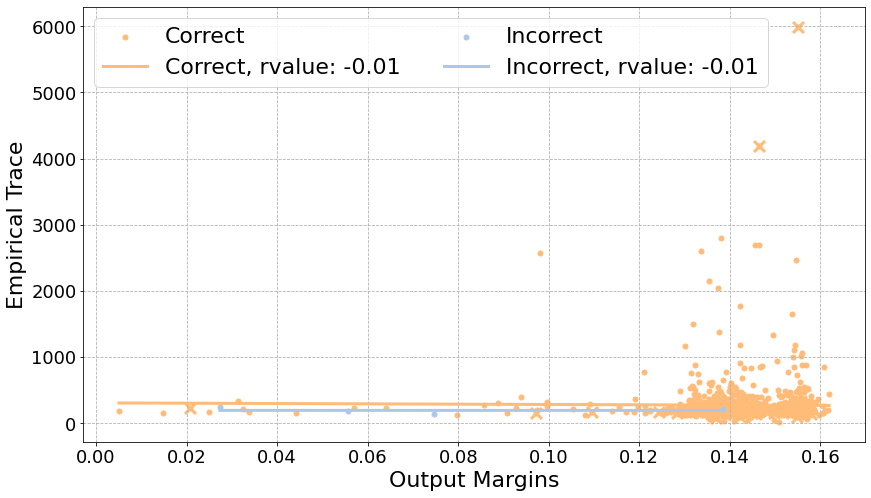

['1605790870.6599188']
403.18874644541455


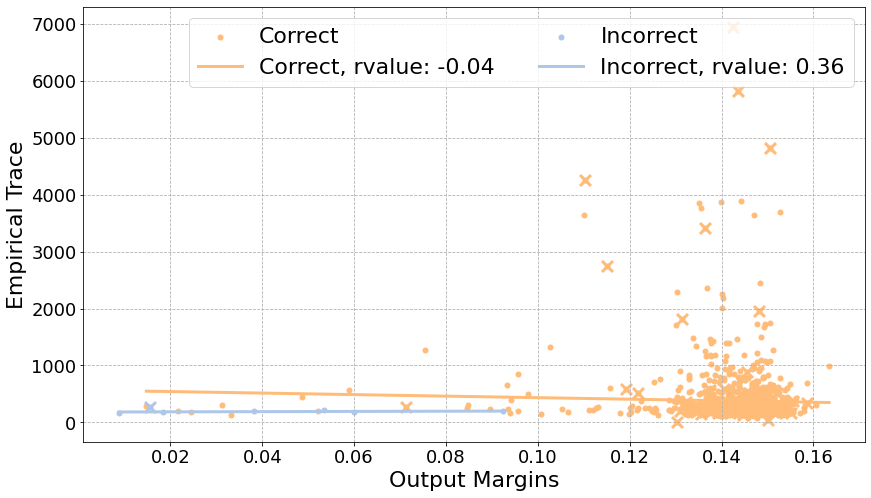

['1605781110.3626354']
402.2763273697999


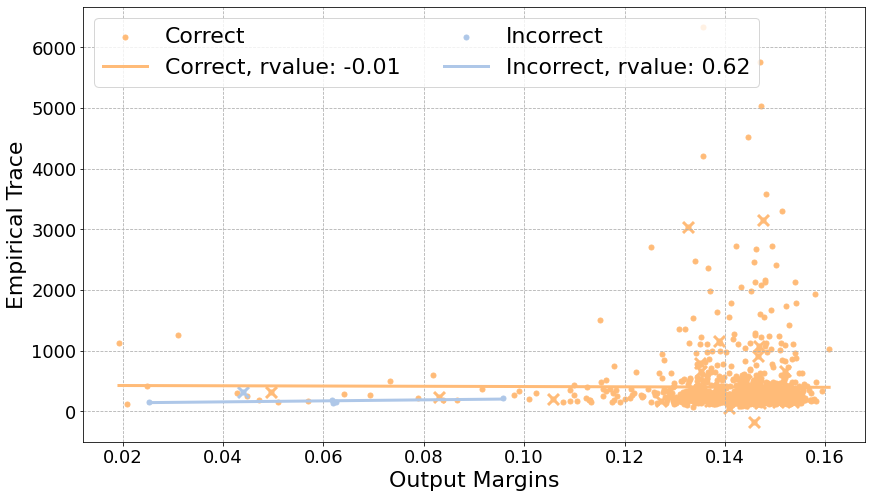

['1605709064.5681076']
332.78225616727144


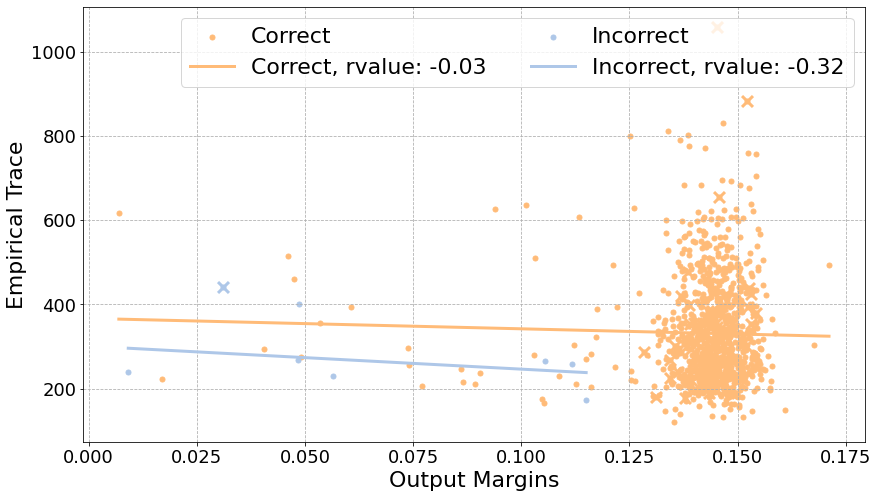

['1605736263.892211']
327.61745150337345


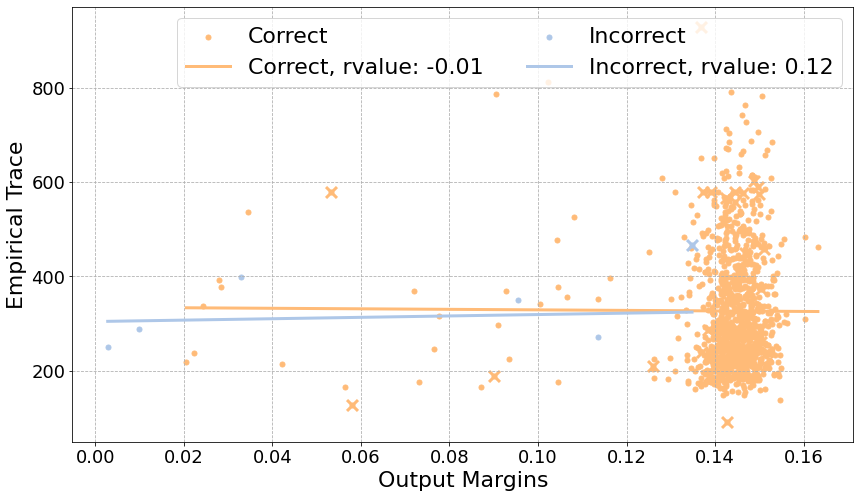

['1605722266.4312668']
313.54457007082794


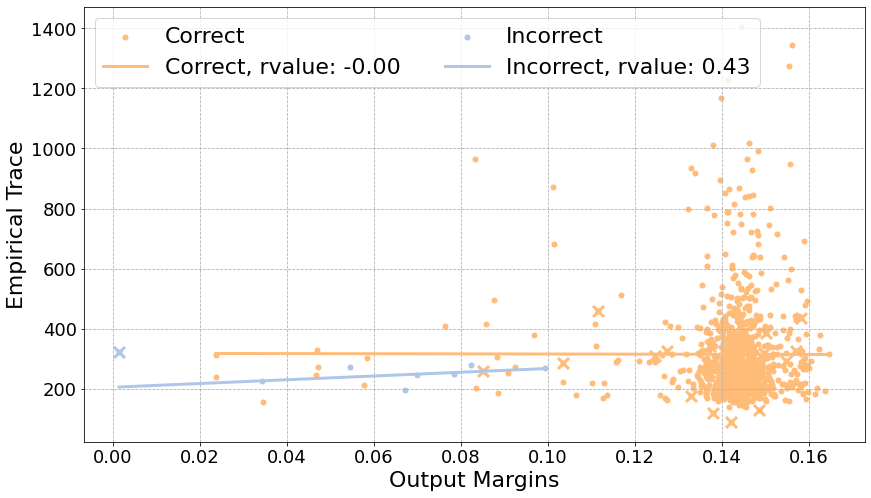

['1605747491.4347072']
235.27437328108303


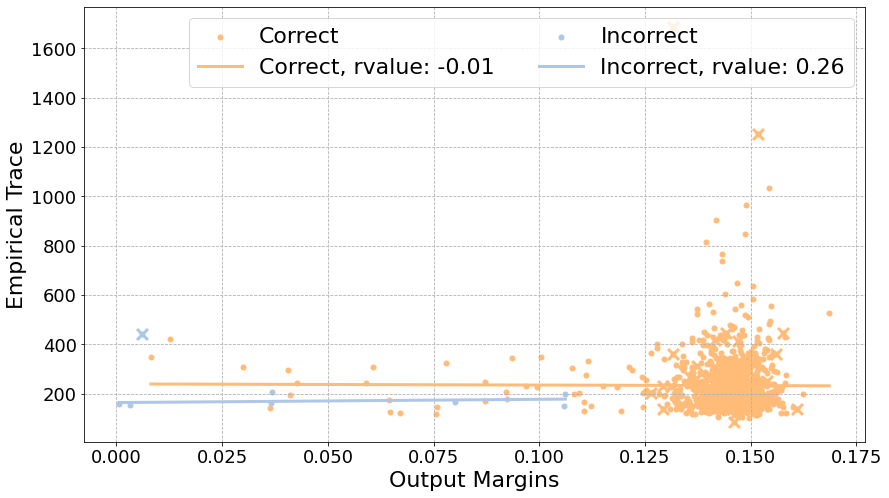

['1605763287.7375257']
232.5395053919898


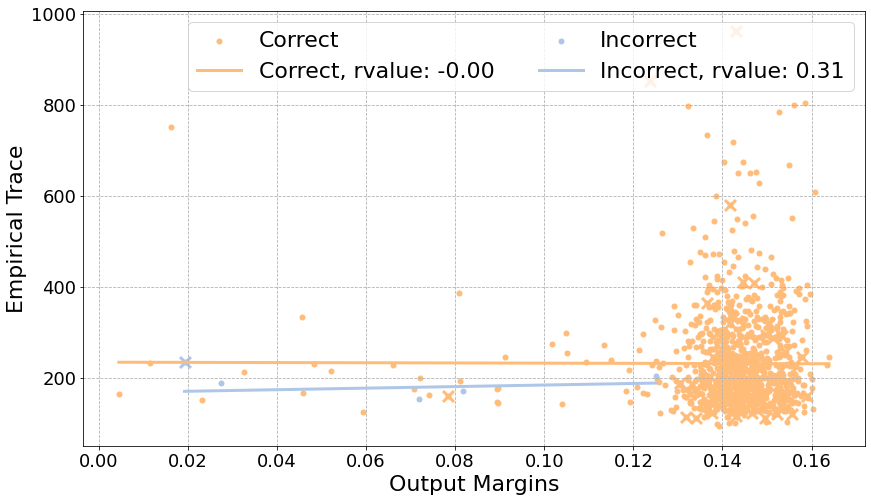

['1605755531.3183007']
226.7453415965363


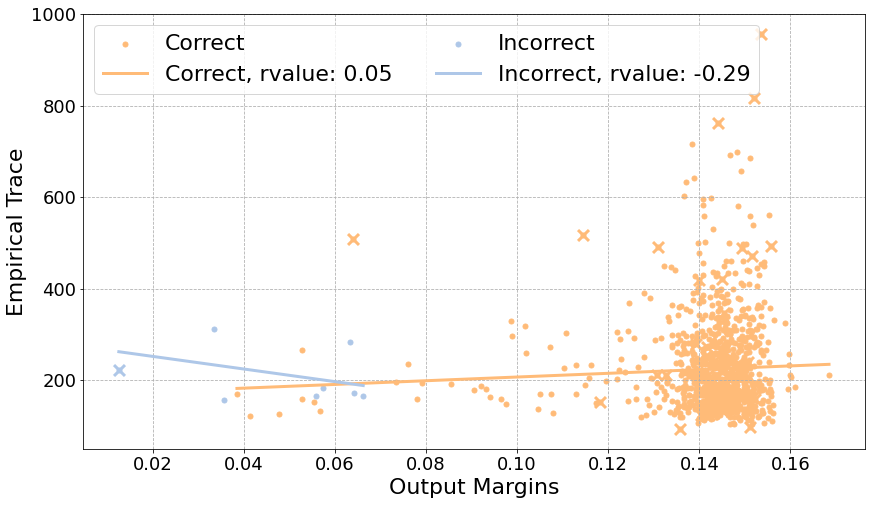

['1605773873.7317605']
475.3398629574874


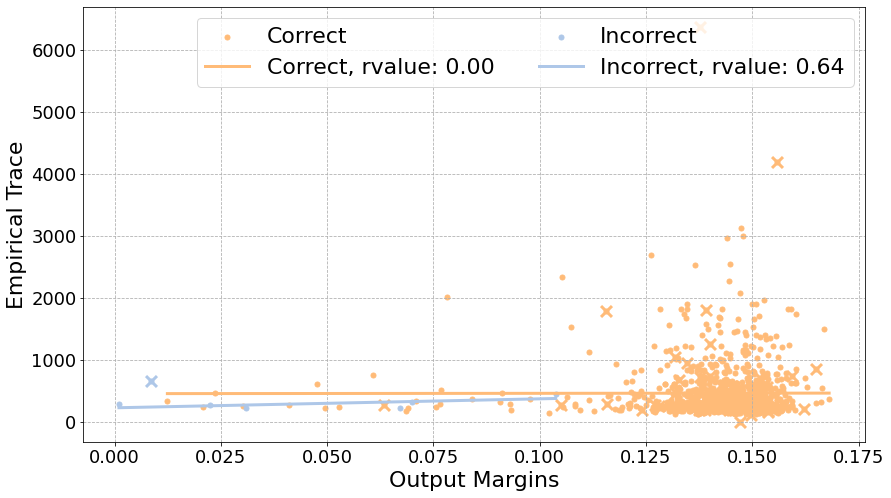

['1605792707.1985679']
475.54913183993193


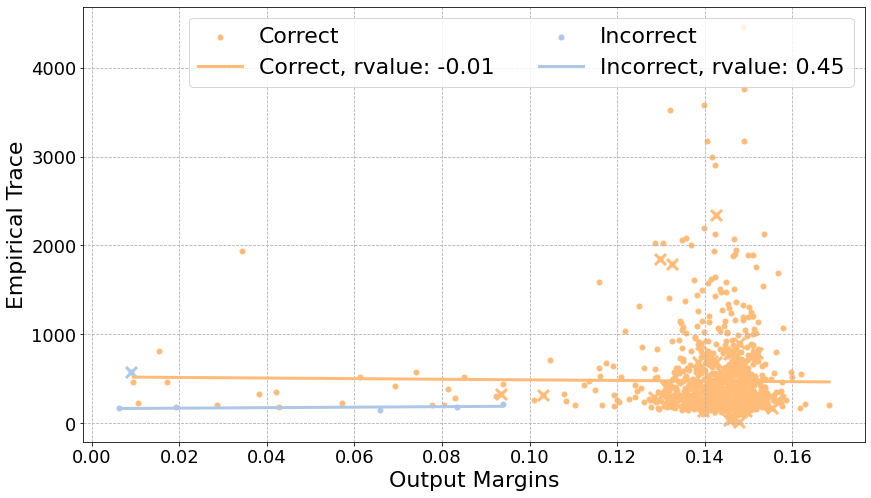

['1605783475.261305']
451.19452491513823


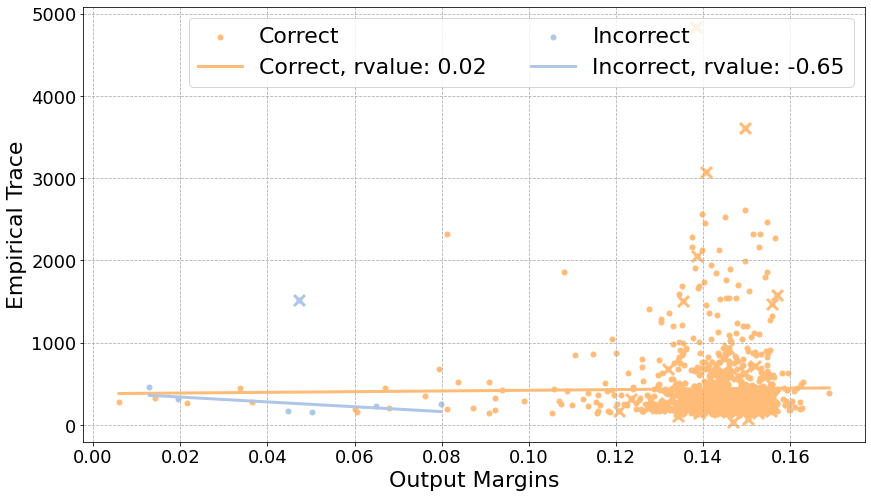

['1605700775.7482944']
138.44955636026165


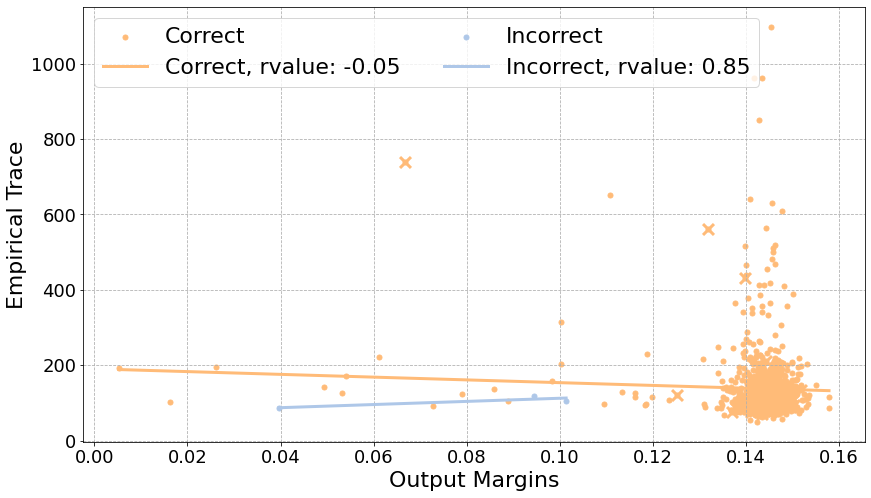

['1605727775.7052782']
134.12091944555777


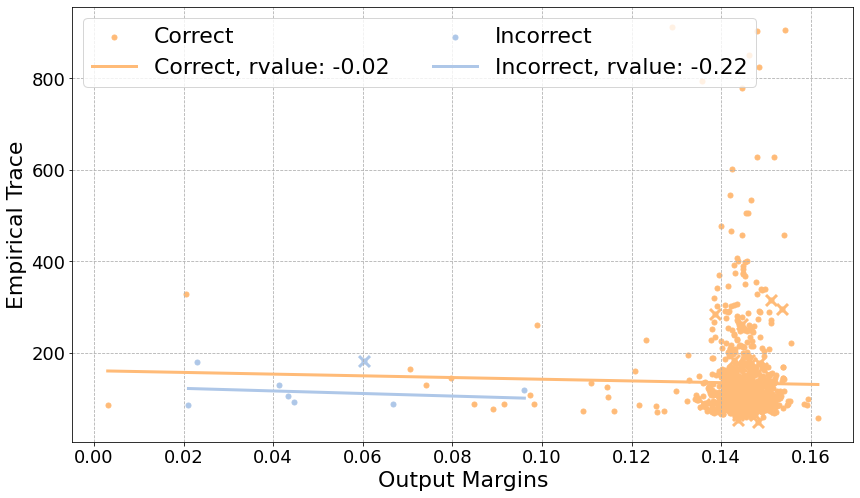

['1605714440.2494066']
118.48385888714263


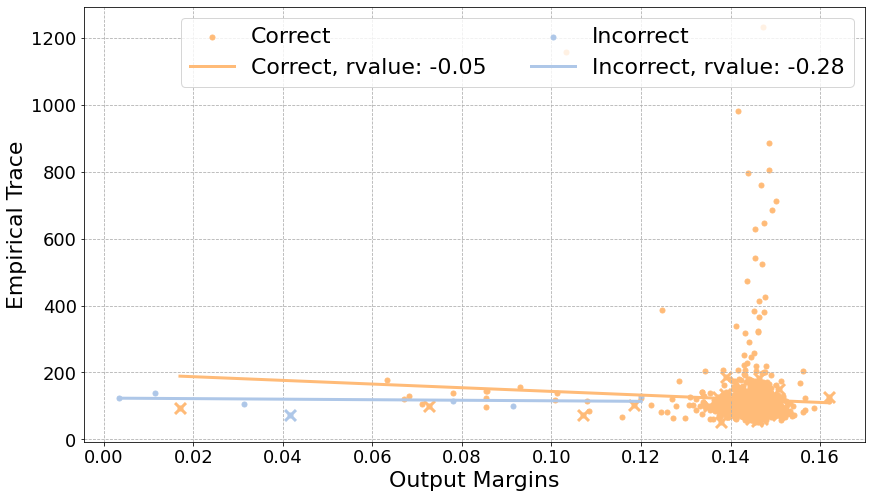

['1605742749.7414746']
163.41629184806294


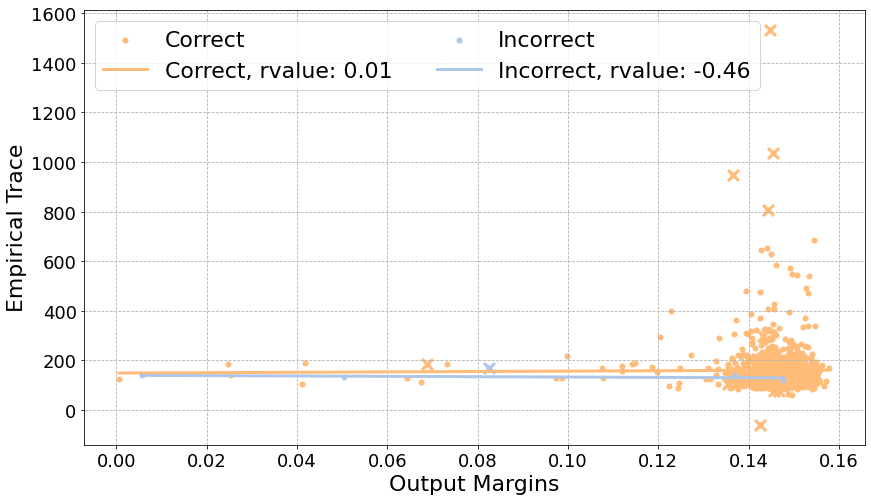

['1605758851.3692572']
139.0656971107178


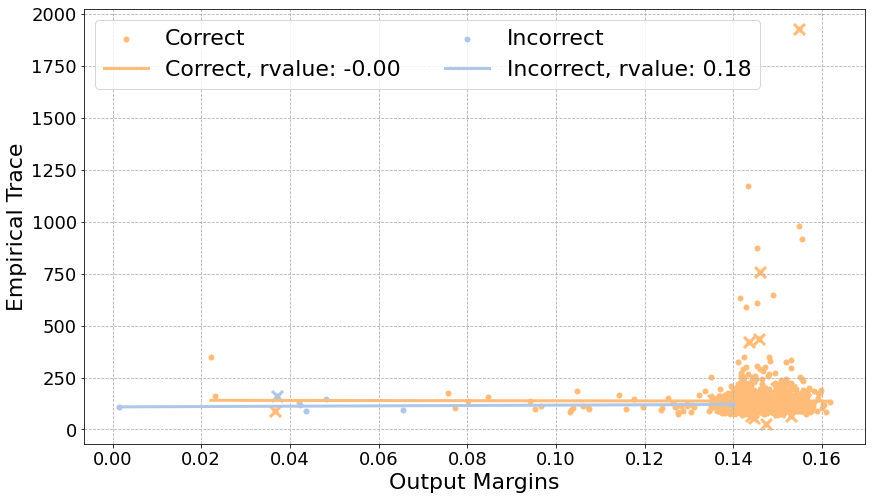

['1605750983.0040905']
177.74002482600136


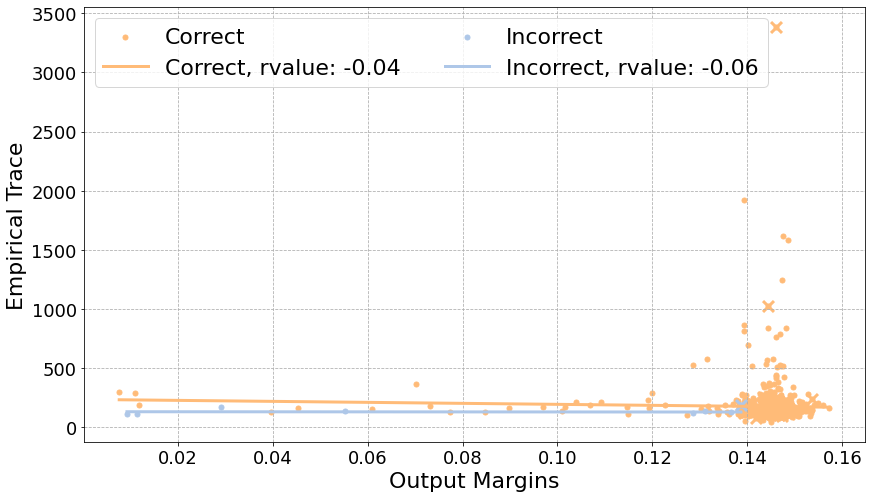

['1605767263.584062']
381.20217438130834


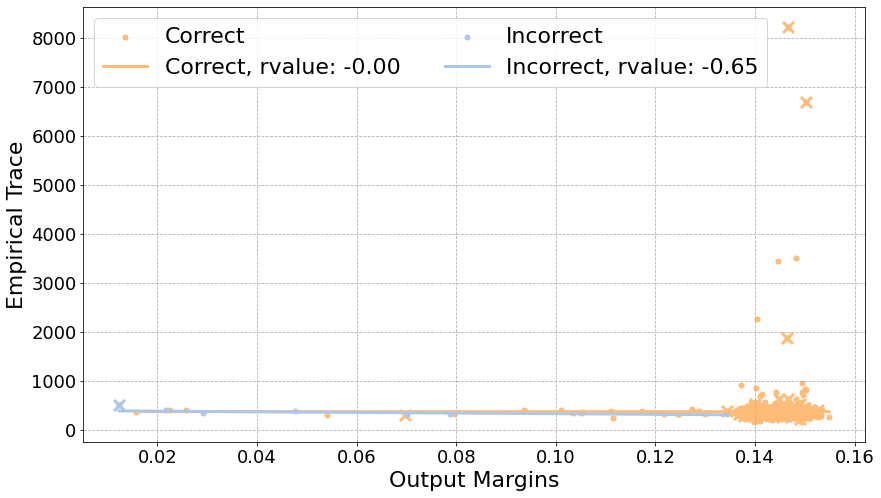

['1605785966.9927886']
417.40227305493215


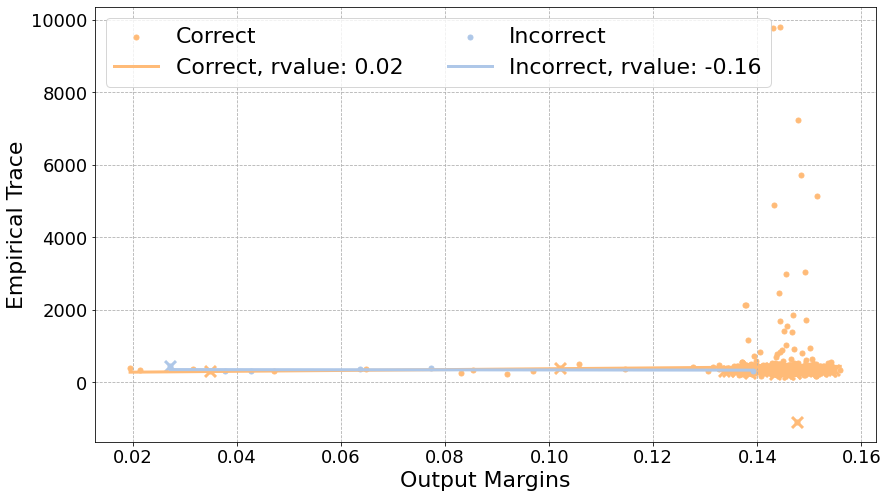

['1605776366.9807928']
359.5653985178111


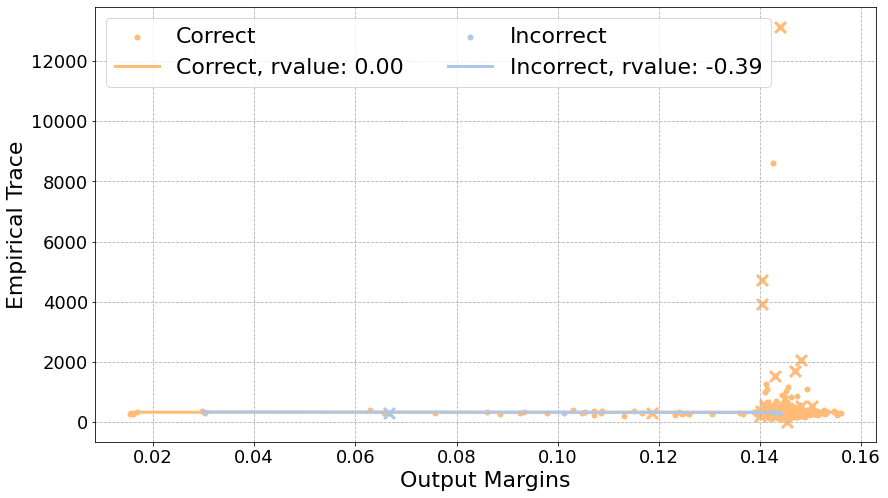

['1605703351.9357302']
240.8640546442549


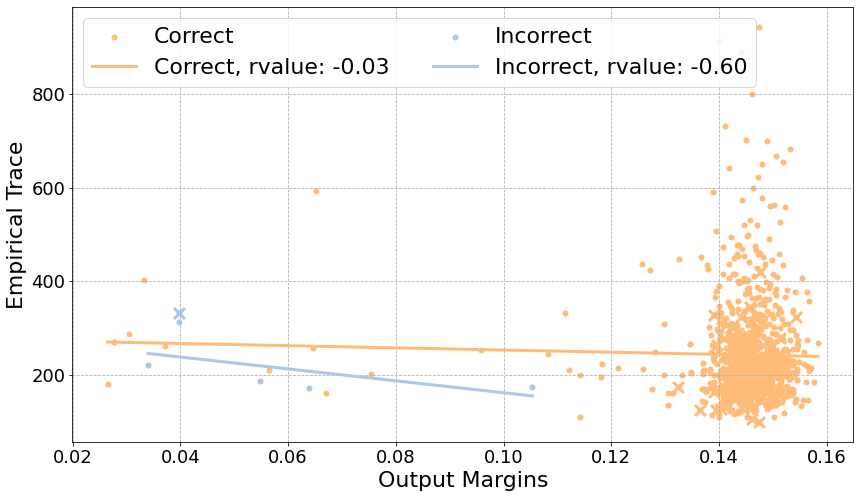

['1605730391.2857454']
225.76452177619896


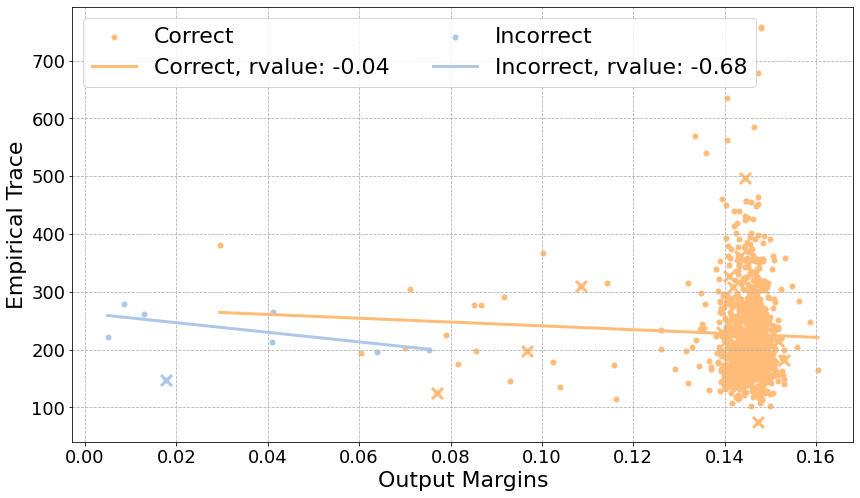

['1605716844.3643658']
197.9976401943938


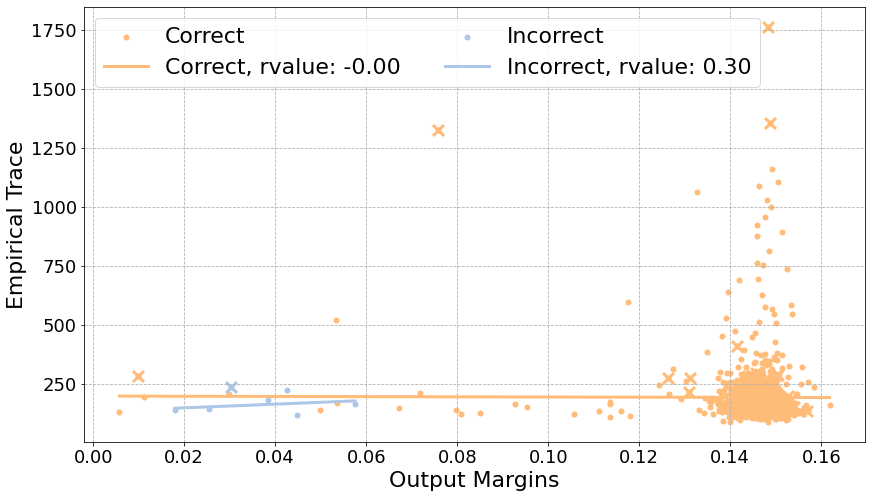

['1605744644.0680192']
159.06324327957788


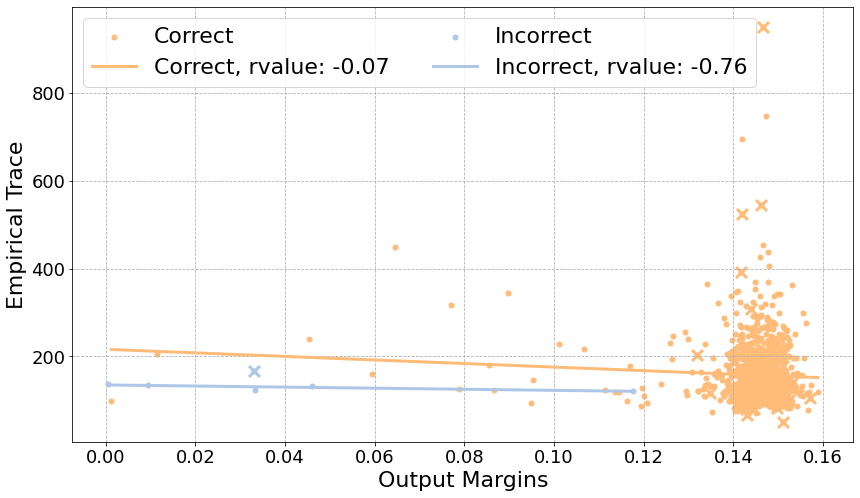

['1605760475.7594373']
165.58044024656655


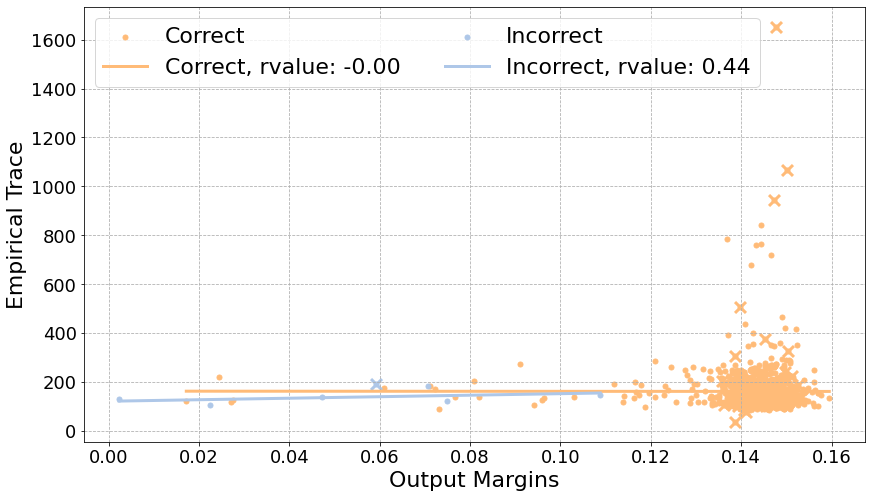

['1605752757.0225925']
155.9474637282683


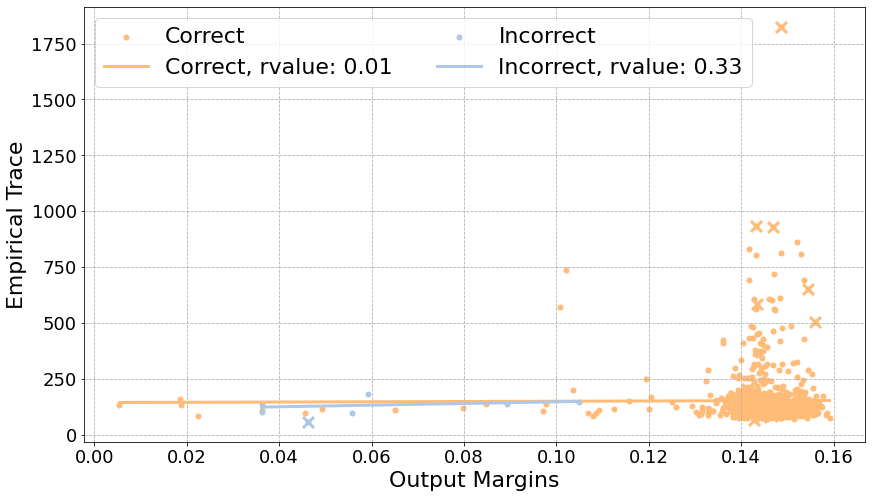

['1605771516.0016963']
659.6983149731647


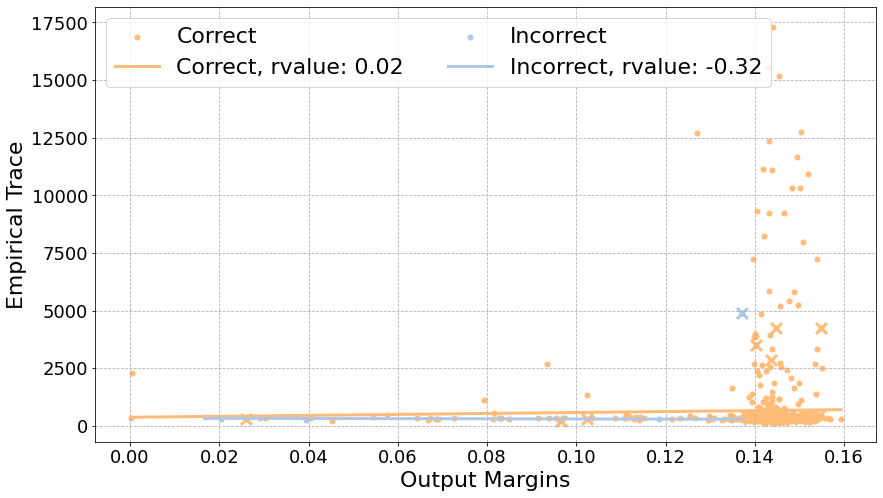

['1605790163.0726247']
757.7384321500174


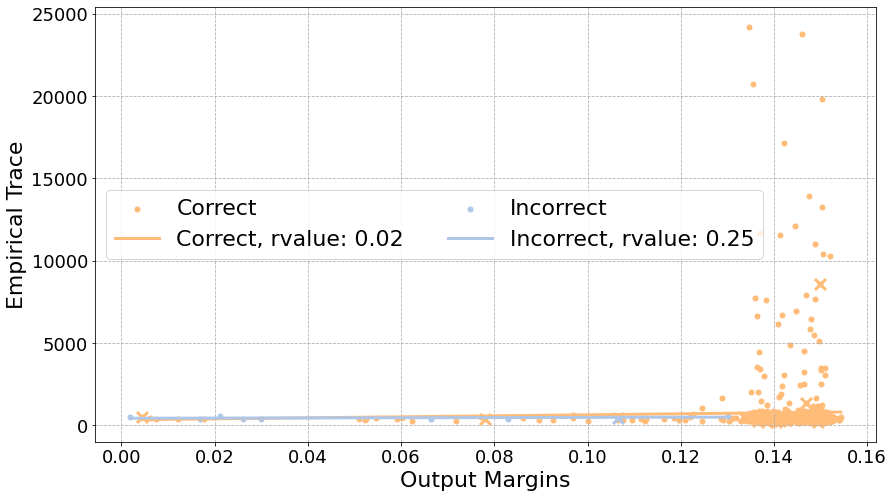

['1605780642.7221725']
548.9838308167705


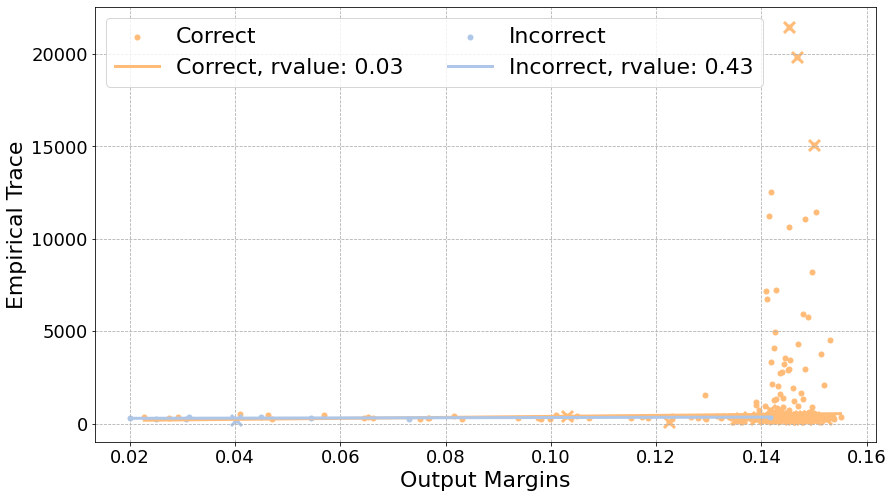

['1605707635.9922638']
302.50532531108547


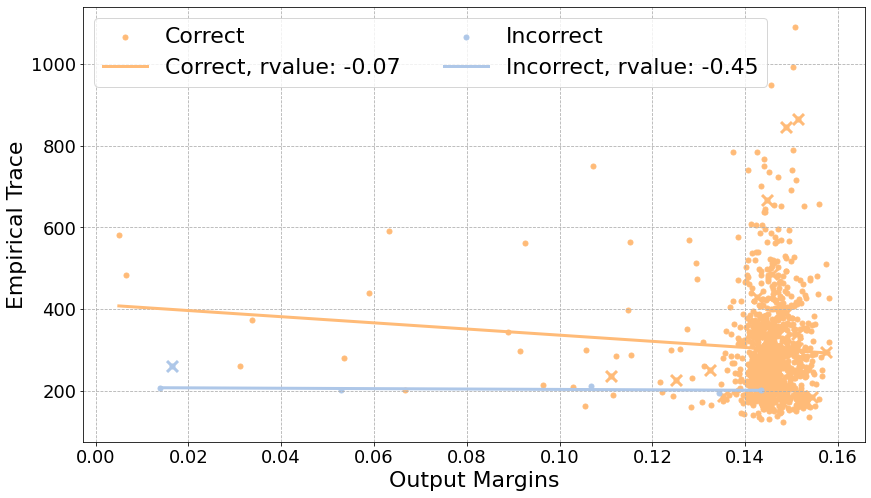

['1605734628.5586398']
296.30170330459185


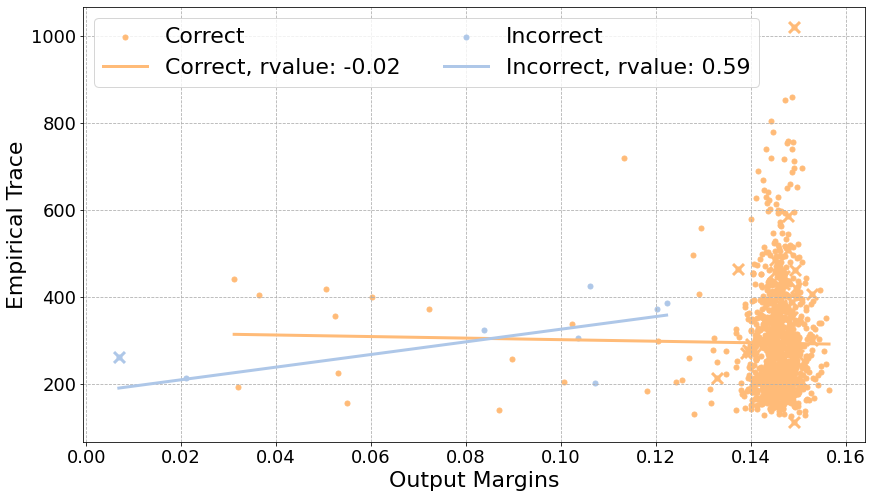

['1605720792.8759825']
283.4678403385454


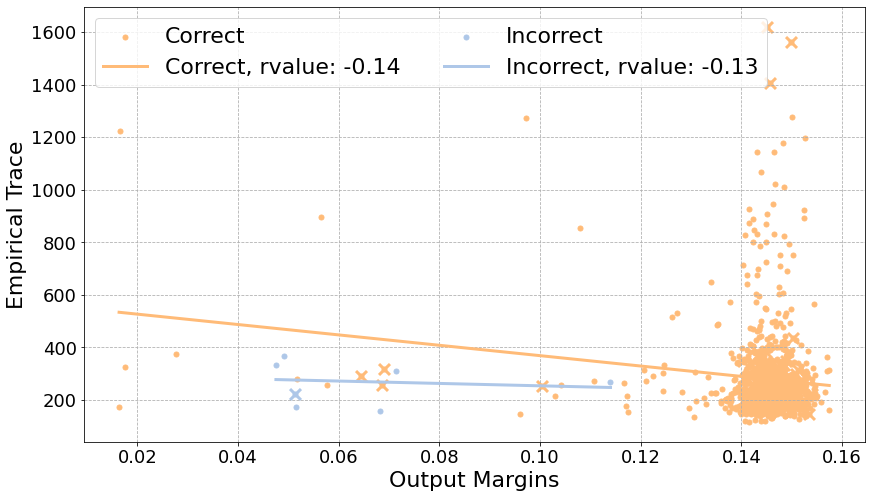

['1605746683.8927536']
188.75856632989726


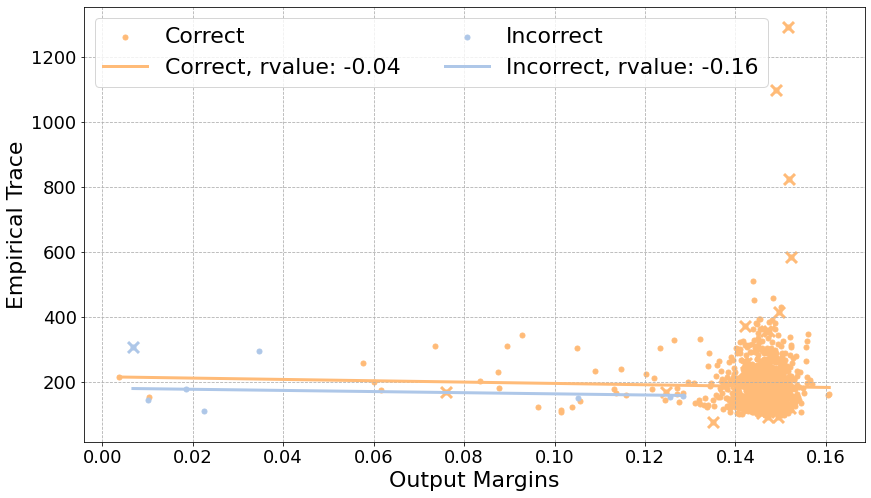

['1605762512.8396404']
184.8565500923842


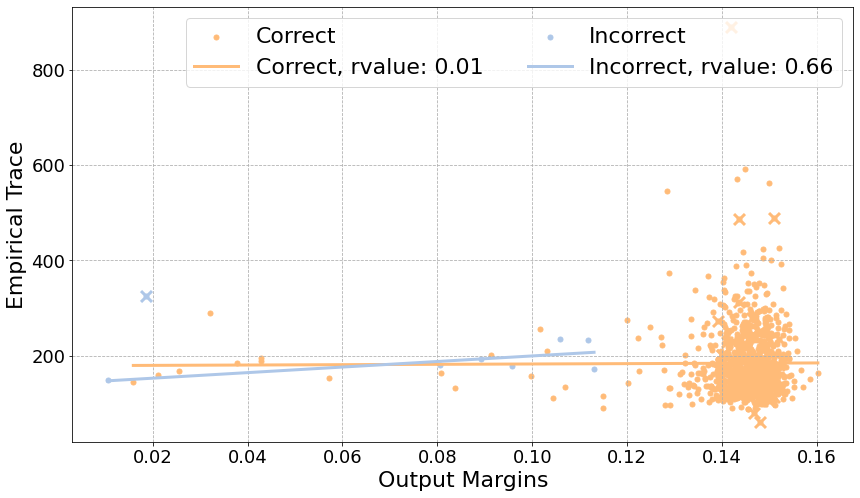

['1605754740.0566149']
186.941579437514


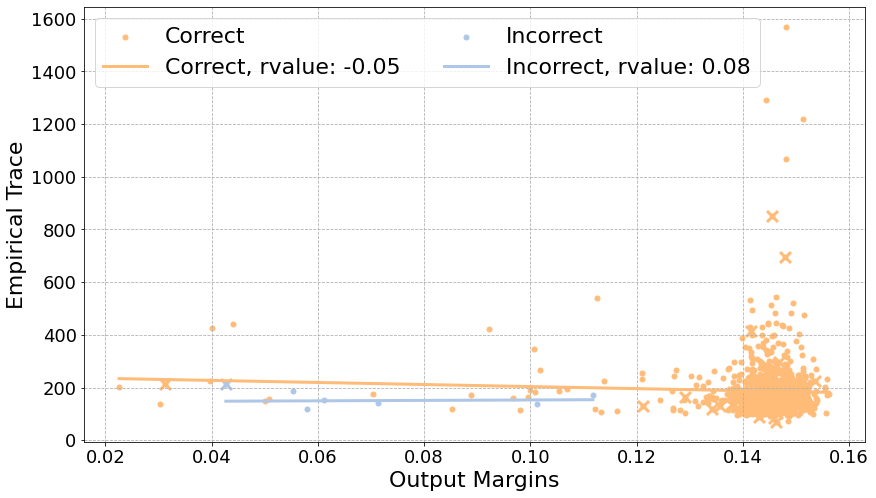

['1605773432.326807']
330.83501006228397


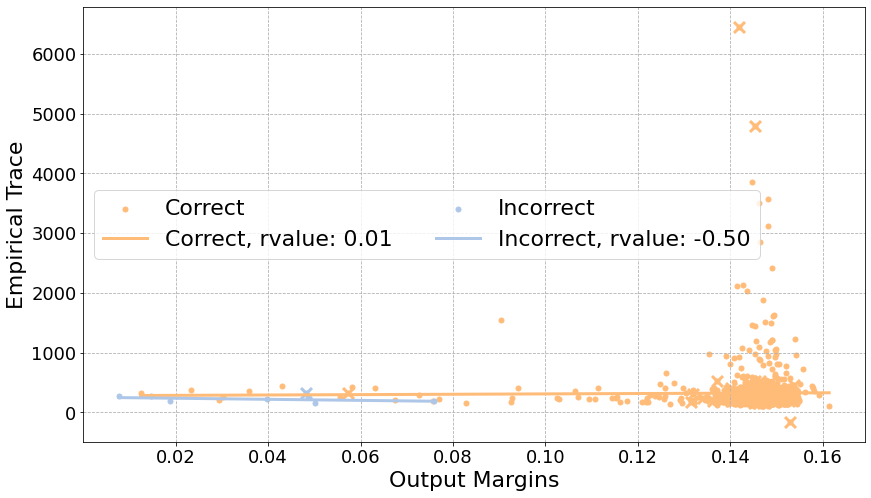

['1605792172.721397']
365.3028644556266


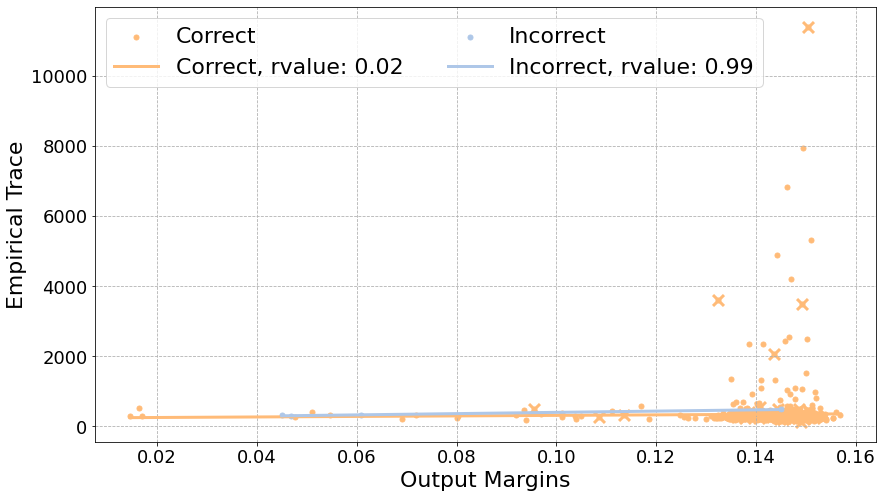

['1605782944.8239033']
418.52322571050377


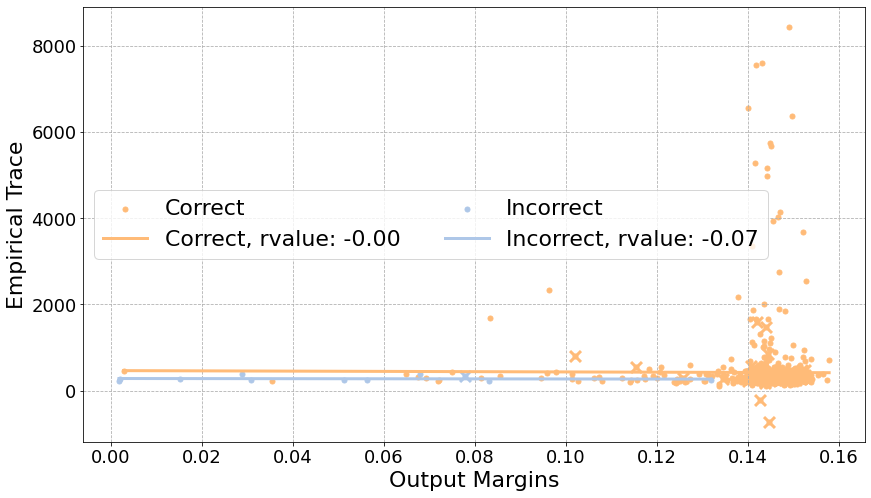

In [13]:
if should_save:
    save_time_path = os.path.join(experiment_folder, "time_corr")
    if not os.path.isdir(save_time_path):
        os.mkdir(save_time_path)
else:
    save_time_path = None

for step in [-1]:
#     acc, _ = load_cached_data(experiment_folder, "acc", step=step)
    
    curr_point_traces, meta = mf.save_load.load_cached_data(experiment_folder, "point_traces", step=step)
    if X_axis_name == "Output Margins":
        corr_candidate_filter = mf_post.postprocess_experiment.get_exp_margins(experiment_folder, softmax_outputs=False, step=step, seed=0, device=None, num_datapoints=1000, on_test_set=False, should_cache=False)
    
    if X_axis_name == "Jacobian":
        corr_candidate_filter = mf_post.postprocess_experiment.get_exp_inp_out_jacobian(experiment_folder, step=step, seed=0, device=None, num_datapoints=100, on_test_set=False, should_cache=False)
    
    curr_plot_name = "{}_step_{}".format(plot_name, step)
    
    data_func = mf_post.stats_plotting.margin_trace_correct_incorrect_plot(corr_candidate_filter, curr_point_traces, use_correct_filter=use_correct_filter, draw_correlation=draw_correlation)
    
    mf_post.stats_plotting.hp_data_func_plot(experiment_folder, data_func, X_axis_name, Y_axis_name, 
                      curr_plot_name, filter_seperate, filter_not_seperate,
                 save_time_path, X_axis_bounds, Y_axis_bounds, 
                    pre_filtered_exp_ids)

 


In [151]:
# root_folder = os.environ["PATH_TO_DEEP_FOLDER"]
# data_name = "MNIST"
# exp = "Keskar_F1"
experiment_folder = os.path.join(root_folder, "experiments", data_name, exp)


# X_data_filter_f = lambda step: get_exp_linear_loss_trace(experiment_folder, step=step, seed=0, device=None, num_datapoints=1000, on_test_set=False, should_cache=False)

X_data_filter_f = lambda step: get_exp_margins(experiment_folder, get_upperbound=True, softmax_outputs=True, step=step, seed=0, device=None, num_datapoints=100, on_test_set=False, should_cache=False) # get_exp_linear_loss_trace(experiment_folder, step=step, seed=0, device=None, num_datapoints=1000, on_test_set=False, should_cache=False)

Y_data_f = lambda step:  load_cached_data(experiment_folder, "point_traces", step=step)[0]
use_correct_filter = True
c = get_corr_array(experiment_folder, X_data_filter_f, Y_data_f, use_correct_filter)


0
Files already downloaded and verified
Files already downloaded and verified
0.007775068283081055
0.0053670406341552734
0.004993915557861328
-11415364.423753237
1
Files already downloaded and verified
Files already downloaded and verified
0.006078958511352539
0.005401134490966797
0.005295753479003906
-1422420.8682907124
1001
Files already downloaded and verified
Files already downloaded and verified
0.0066449642181396484
0.006666898727416992
0.0058100223541259766
-4276.959316511439
2001
Files already downloaded and verified
Files already downloaded and verified
0.006390094757080078
0.006201982498168945
0.006473064422607422
-895.4957707184025
3001
Files already downloaded and verified
Files already downloaded and verified
0.005825042724609375
0.005322933197021484
0.004847049713134766
113.71981656160801
4001
Files already downloaded and verified
Files already downloaded and verified
0.005561113357543945
0.005582094192504883
0.005338191986083984
-231.58002542439414
5001
Files already dow

/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Files already downloaded and verified
Files already downloaded and verified
0.006345987319946289
0.006281852722167969
0.006587028503417969
6819.68039839413
35001
Files already downloaded and verified
Files already downloaded and verified
0.00621795654296875
0.005480289459228516
0.005060911178588867
6973.292069336138
36001
Files already downloaded and verified
Files already downloaded and verified
0.006343841552734375
0.005423784255981445
0.005165815353393555
6567.187020832616
37001
Files already downloaded and verified
Files already downloaded and verified
0.0055768489837646484
0.005276203155517578
0.005255937576293945
5395.665370700272
38001
Files already downloaded and verified
Files already downloaded and verified
0.005836963653564453
0.00545191764831543
0.00550079345703125
7545.026453447821
39001


/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Files already downloaded and verified
Files already downloaded and verified
0.0059778690338134766
0.0053501129150390625
0.005009174346923828
7847.011097193467
40001
Files already downloaded and verified
Files already downloaded and verified
0.005805015563964844
0.005658864974975586
0.0052089691162109375
8585.72644587561
41001
Files already downloaded and verified
Files already downloaded and verified
0.005549192428588867
0.0052280426025390625
0.005177974700927734
9816.4114276096
42001


/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Files already downloaded and verified
Files already downloaded and verified
0.006154775619506836
0.006459951400756836
0.005519866943359375
8052.373098327558
43001


/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Files already downloaded and verified
Files already downloaded and verified
0.005566120147705078
0.005244016647338867
0.004961967468261719
6601.536415384855
44001
Files already downloaded and verified
Files already downloaded and verified
0.005669355392456055
0.00516200065612793
0.0050928592681884766
3990.7573044233627
45001
Files already downloaded and verified
Files already downloaded and verified
0.00568389892578125
0.00626826286315918
0.004968166351318359
11555.92778558974
46001
Files already downloaded and verified
Files already downloaded and verified
0.005666017532348633
0.00519871711730957
0.0052187442779541016
9148.523637873986
47001


/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Files already downloaded and verified
Files already downloaded and verified
0.006172895431518555
0.005444049835205078
0.004942893981933594
6642.394063724272
48001


/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Files already downloaded and verified
Files already downloaded and verified
0.005568027496337891
0.005622148513793945
0.005536079406738281
14456.385045624216
49001


/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Files already downloaded and verified
Files already downloaded and verified
0.005755901336669922
0.0052509307861328125
0.005002021789550781
5158.536396293251
50001


/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Files already downloaded and verified
Files already downloaded and verified
0.0054547786712646484
0.005730152130126953
0.0049610137939453125
8078.7041606656285
50002


/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Files already downloaded and verified
Files already downloaded and verified
0.005645036697387695
0.005626678466796875
0.00490880012512207
8078.7041606656285


/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/daniellengyel/miniconda3/envs/gen/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


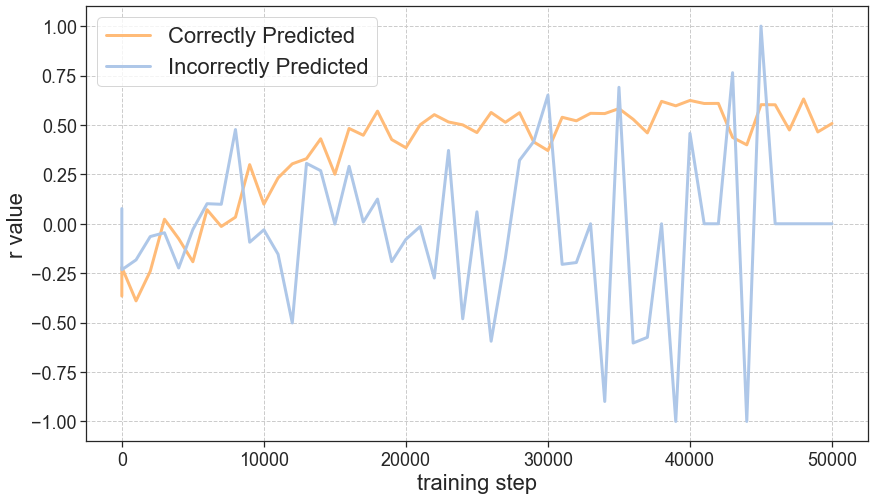

In [152]:
for exp_id in c:
    if exp_id != "1605478459.1644921":
        continue
        
    a = c[exp_id]["0"]

    plots = []
    plots_names = []
    X_axis_name = "training step"
    Y_axis_name = "r value"

    save_location = None # os.path.join(experiment_folder, "time_r_margins_{}".format(stats_df.loc[exp_id]["batch_train_size"]))


    plots.append(plt.plot(list(a["correct_r_value"].keys()), list(a["correct_r_value"].values()), label="Correctly Predicted", color=COLORS[CORRECT_COLOR_IDX]))
    plots.append(plt.plot(list(a["incorrect_r_value"].keys()), list(a["incorrect_r_value"].values()), label="Incorrectly Predicted",  color=COLORS[INCORRECT_COLOR_IDX]))
#     plots_names = ["Correctly Predicted", "Incorrectly Predicted"] 

    
    costum_plot(plots, plots_names, X_axis_name, Y_axis_name, X_axis_bounds=None, Y_axis_bounds=None, save_location=save_location)



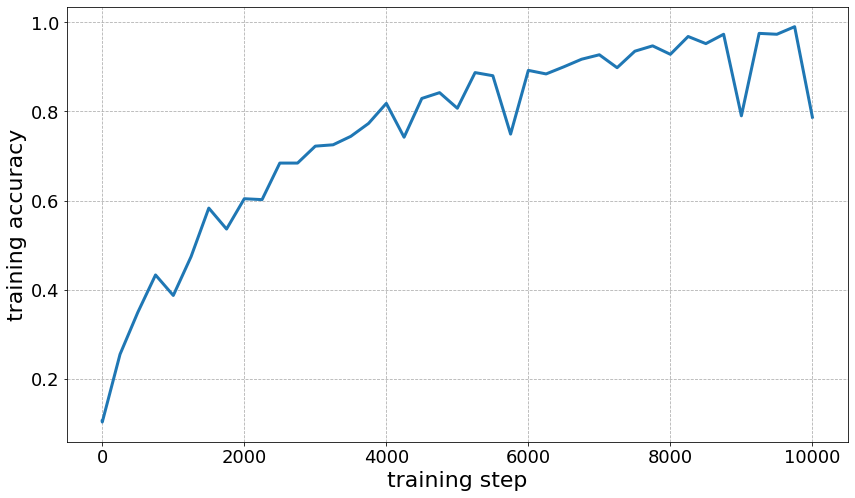

In [158]:
plots = []
plots_names = []
X_axis_name = "training step"
Y_axis_name = "training accuracy"

save_location = os.path.join(experiment_folder, "time_acc")


plots.append(plt.plot(list(a["acc"].keys()), list(a["acc"].values())))

costum_plot(plots, plots_names, X_axis_name, Y_axis_name, X_axis_bounds=None, Y_axis_bounds=None, save_location=save_location)



In [185]:
h_arr = []
m_arr = []
for step in np.linspace(0, 10000, 21):
    print(step)
    curr_point_traces, meta = load_cached_data(experiment_folder, "point_traces", step=int(step)+1)
    h_arr.append(curr_point_traces)
#         linear_loss_trace_filters = get_exp_linear_loss_trace(experiment_folder, step=step+1, seed=0, device=None, num_datapoints=1000, on_test_set=False, should_cache=False)
    linear_loss_trace_filters = get_exp_margins(experiment_folder, softmax_outputs=False, step=int(step) + 1, seed=0, device=None, num_datapoints=1000, on_test_set=False, should_cache=False)
#     h_arr.append(curr_point_traces)
    m_arr.append(linear_loss_trace_filters)
    




0.0
0.035897016525268555
0.041513919830322266
500.0
0.03803586959838867
0.03834700584411621
1000.0
0.03677177429199219
0.03812575340270996
1500.0
0.04125714302062988
0.04334616661071777
2000.0
0.03639698028564453
0.041529178619384766
2500.0
0.04678010940551758
0.040138959884643555
3000.0
0.04562497138977051
0.04002571105957031
3500.0
0.04656505584716797
0.04803204536437988
4000.0
0.04390096664428711
0.03978300094604492
4500.0
0.04471302032470703
0.03677105903625488
5000.0
0.03907203674316406
0.03734922409057617
5500.0
0.044157981872558594
0.04265189170837402
6000.0
0.044261932373046875
0.03972220420837402
6500.0
0.04278683662414551
0.040013790130615234
7000.0
0.04221701622009277
0.04300284385681152
7500.0
0.045823097229003906
0.041023969650268555
8000.0
0.043543100357055664
0.041185855865478516
8500.0
0.045545101165771484
0.03993391990661621
9000.0
0.043974876403808594
0.04049992561340332
9500.0
0.0421602725982666
0.038110971450805664
10000.0
0.04344964027404785
0.0391387939453125


In [192]:
h_res = [[], []]
for t in range(len(m_arr)):
    for i, exp_id in enumerate(h_arr[t]):
        h = h_arr[t][exp_id]['0']
#         h_res[i].append(np.mean(h))
        h_res[i].append(scipy.stats.moment(h, moment=3))

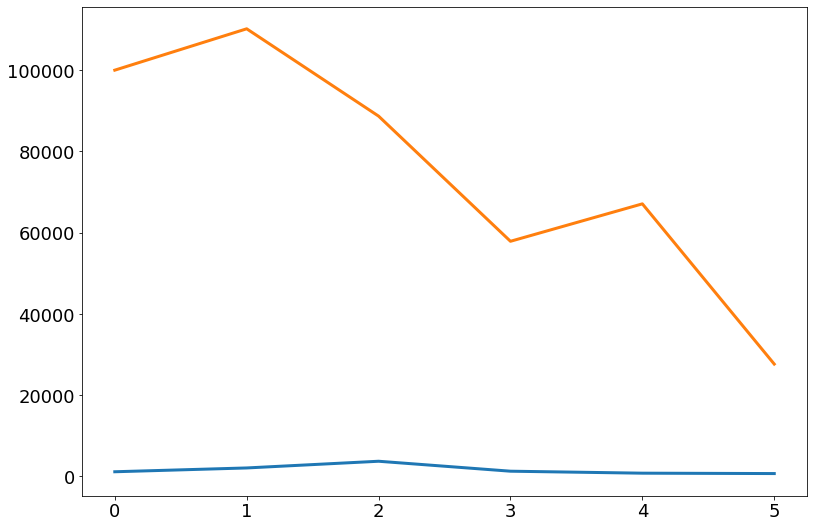

In [198]:
plt.plot(h_res[0][15:])
plt.plot(h_res[1][15:])


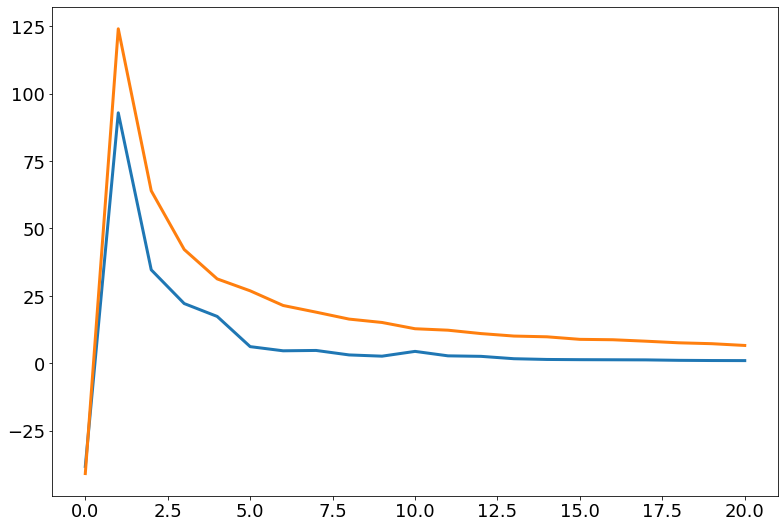

In [191]:
plt.plot(h_res[0])
plt.plot(h_res[1])


In [194]:
res = [[], []]
for t in range(len(m_arr)):
    for i, exp_id in enumerate(m_arr[t]):
        m, f = m_arr[t][exp_id]['0']
#         res[i].append(np.mean(m[f]))
        res[i].append(scipy.stats.moment(m[f], moment=3))

In [182]:
res

[[], []]

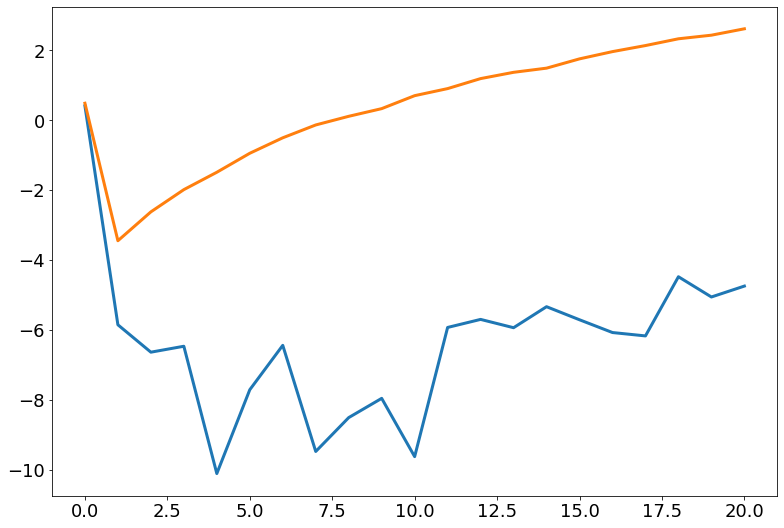

In [195]:
plt.plot(res[0])
plt.plot(res[1])


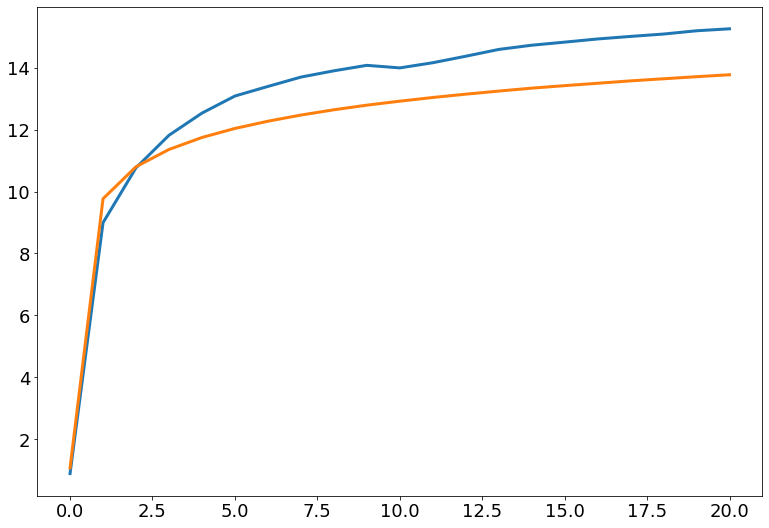

In [170]:
plt.plot(res[0])
plt.plot(res[1])


In [256]:
def get_model_num_params(model):
    num_params = 0
    for name1, param1 in model.named_parameters():
        num_params += param1.numel()
    return num_params

# m = mf_nets.Nets.BatchNormSimpleNet(28* 28* 3, 10)

m = mf_nets.Nets.KeskarC3(28, 28, 3, 10)
get_model_num_params(m)

3647232

In [238]:
import margin_flatness.nets as mf_nets 